In [1]:
import os
import glob
import pandas as pd

In [2]:
def import_idmt_traffic_dataset(fn_txt: str = "idmt_traffic_all") -> pd.DataFrame:
    """ Import IDMT-Traffic dataset
    Args:
        fn_txt (str): Text file with all WAV files
    Returns:
        df_dataset (pd.Dataframe): File-wise metadata
            Columns:
                'file': WAV filename,
                'is_background': True if recording contains background noise (no vehicle), False else
                'date_time': Recording time (YYYY-MM-DD-HH-mm)
                'location': Recording location
                'speed_kmh': Speed limit at recording site (km/h), UNK if unknown,
                'sample_pos': Sample position (centered) within the original audio recording,
                'daytime': M(orning) or (A)fternoon,
                'weather': (D)ry or (W)et road condition,
                'vehicle': (B)us, (C)ar, (M)otorcycle, or (T)ruck,
                'source_direction': Source direction of passing vehicle: from (L)eft or from (R)ight,
                'microphone': (SE)= (high-quality) sE8 microphones, (ME) = (low-quality) MEMS microphones (ICS-43434),
                'channel': Original stereo pair channel (12) or (34)
    """
    # load file list
    df_files = pd.read_csv(fn_txt, names=('file',))
    fn_file_list = df_files['file'].to_list()

    # load metadata from file names
    df_dataset = []

    for f, fn in enumerate(fn_file_list):
        fn = fn.replace('.wav', '')
        parts = fn.split('_')

        # background noise files
        if '-BG' in fn:
            date_time, location, speed_kmh, sample_pos, mic, channel = parts
            vehicle, source_direction, weather, daytime = 'None', 'None', 'None', 'None'
            is_background = True

        # files with vehicle passings
        else:
            date_time, location, speed_kmh, sample_pos, daytime, weather, vehicle_direction, mic, channel = parts
            vehicle, source_direction = vehicle_direction
            is_background = False

        channel = channel.replace('-BG', '')
        speed_kmh = speed_kmh.replace('unknownKmh', 'UNK')
        speed_kmh = speed_kmh.replace('Kmh', '')

        df_dataset.append({'file': fn,
                           'is_background': is_background,
                           'date_time': date_time,
                           'location': location,
                           'speed_kmh': speed_kmh,
                           'sample_pos': sample_pos,
                           'daytime': daytime,
                           'weather': weather,
                           'vehicle': vehicle,
                           'source_direction': source_direction,
                           'microphone': mic,
                           'channel': channel})

    df_dataset = pd.DataFrame(df_dataset, columns=('file', 'is_background', 'date_time', 'location', 'speed_kmh', 'sample_pos', 'daytime', 'weather', 'vehicle',
                                                   'source_direction', 'microphone', 'channel'))

    return df_dataset

In [8]:
if __name__ == '__main__':

    # example use
    fn_txt_list = ["/home/selim/Downloads/IDMT_Traffic/annotation/eusipco_2021_train.txt"]   # complete IDMT-Traffic dataset
                   #"eusipco_2021_train.txt",  # training set of EUSIPCO 2021 paper
                   #"eusipco_2021_test.txt"]   # test set of EUSIPCO 2021 paper
                   #"idmt_traffic_all.txt",  # training set of EUSIPCO 2021 paper

    # import metadata
    for fn_txt in fn_txt_list:
        print('Metadata for {}:'.format(fn_txt))
        print(import_idmt_traffic_dataset(fn_txt))

Metadata for /home/selim/Downloads/IDMT_Traffic/annotation/eusipco_2021_train.txt:
                                                   file  is_background  \
0     2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1007744...           True   
1     2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1017344...           True   
2     2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1026944...           True   
3     2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1036544...           True   
4     2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1046144...           True   
...                                                 ...            ...   
5868  2020-08-29-16-07_Hohenwarte_unknownKmh_699490_...          False   
5869  2020-08-29-16-07_Hohenwarte_unknownKmh_727453_...          False   
5870  2020-08-29-16-07_Hohenwarte_unknownKmh_728153_...          False   
5871  2020-08-29-16-07_Hohenwarte_unknownKmh_728740_...          False   
5872  2020-08-29-16-07_Hohenwarte_unknownKmh_730760_...          False   

             date_time      

In [9]:
data = import_idmt_traffic_dataset(fn_txt)

In [10]:
data

,file,is_background,date_time,location,speed_kmh,sample_pos,daytime,weather,vehicle,source_direction,microphone,channel
0,2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1007744...,True,2019-10-22-08-40,Fraunhofer-IDMT,30,10077440,None,None,None,None,SE,CH34
1,2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1017344...,True,2019-10-22-08-40,Fraunhofer-IDMT,30,10173440,None,None,None,None,SE,CH34
2,2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1026944...,True,2019-10-22-08-40,Fraunhofer-IDMT,30,10269440,None,None,None,None,SE,CH34
3,2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1036544...,True,2019-10-22-08-40,Fraunhofer-IDMT,30,10365440,None,None,None,None,SE,CH34
4,2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_1046144...,True,2019-10-22-08-40,Fraunhofer-IDMT,30,10461440,None,None,None,None,SE,CH34
...,...,...,...,...,...,...,...,...,...,...,...,...
5868,2020-08-29-16-07_Hohenwarte_unknownKmh_699490_...,False,2020-08-29-16-07,Hohenwarte,UNK,699490,M,D,M,R,SE,CH12
5869,2020-08-29-16-07_Hohenwarte_unknownKmh_727453_...,False,2020-08-29-16-07,Hohenwarte,UNK,727453,M,D,M,R,SE,CH12
5870,2020-08-29-16-07_Hohenwarte_unknownKmh_728153_...,False,2020-08-29-16-07,Hohenwarte,UNK,728153,M,D,M,R,SE,CH12
5871,2020-08-29-16-07_Hohenwarte_unknownKmh_728740_...,False,2020-08-29-16-07,Hohenwarte,UNK,728740,M,D,M,R,SE,CH12


In [11]:
data['file'][0]

'2019-10-22-08-40_Fraunhofer-IDMT_30Kmh_10077440_SE_CH34-BG'

In [12]:
df = pd.DataFrame(data)
df.to_csv('IDMT_train_data.csv')

In [58]:
# rename files
import os
 
os.chdir('/home/selim/Downloads/IDMT_Traffic_train')
print(os.getcwd())
 

/home/selim/Downloads/IDMT_Traffic_train


In [59]:
for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_name = "geek" + str(count)
 
    new_name = f'{f_name}{f_ext}'
    os.rename(f, new_name)

In [1]:
# We load the requiere libraries
import numpy as np
import pandas as pd 
import os
import git
import librosa
import matplotlib.pyplot as plt
import gc

from tqdm import tqdm, tqdm_notebook
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

import zipfile

tqdm.pandas()

In [2]:
#pip install librosa
#!pip install numba --upgrade

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

2022-12-20 10:48:26.181349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 10:48:28.622938: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-20 10:48:28.622958: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-20 10:48:36.015395: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [4]:
#We load csv with files name. We will use for reading the data
train_df = pd.read_csv('full_data.csv')
#df_noisy = pd.read_csv('../input/freesound-audio-tagging-2019/train_noisy.csv')

#train=pd.concat([df, df_noisy], axis=0)

test_df = pd.read_csv('test_data.csv')

len(test_df)

2857

In [5]:
test_df

,Unnamed: 0,file,B,C,M,T,None
0,0,2019-11-12-09-00_Schleusinger-Allee_70Kmh_1005...,0,0,0,0,0
1,1,2019-11-12-09-00_Schleusinger-Allee_70Kmh_1007...,0,0,0,0,0
2,2,2019-11-12-09-00_Schleusinger-Allee_70Kmh_1011...,0,0,0,0,0
3,3,2019-11-12-09-00_Schleusinger-Allee_70Kmh_1017...,0,0,0,0,0
4,4,2019-11-12-09-00_Schleusinger-Allee_70Kmh_1026...,0,0,0,0,0
...,...,...,...,...,...,...,...
2852,2852,2020-08-29-12-07_Hohenwarte_unknownKmh_816213_...,0,0,0,0,0
2853,2853,2020-08-29-12-07_Hohenwarte_unknownKmh_817360_...,0,0,0,0,0
2854,2854,2020-08-29-12-07_Hohenwarte_unknownKmh_863046_...,0,0,0,0,0
2855,2855,2020-08-29-12-07_Hohenwarte_unknownKmh_863926_...,0,0,0,0,0


In [6]:
#x = test_df.replace(to_replace='None', value='C')

In [7]:
#x.columns[:]

In [8]:
# We get the labels from the test data, we start from 1 because 0 is the file name
# Also, test set only has 80 classes and want to predict according to that.
# Of course, you could create 
# From here we will create Y target

label_columns = test_df.columns[2:]
label_mapping = dict((label, index) for index, label in enumerate(label_columns))

In [9]:
label_mapping

{'B': 0, 'C': 1, 'M': 2, 'T': 3, 'None': 4}

In [10]:
## We can see that several targets are in same space. We need to reshape it into a hot encode format
print(train_df['vehicle'][:10])

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: vehicle, dtype: object


In [11]:
#x = train_df.replace(to_replace='None', value='C')
#x 

In [12]:
df = train_df

In [13]:
def split_and_label(rows_labels):
    
    row_labels_list = []
    for row in rows_labels:
        row_labels = row.split(',')
        labels_array = np.zeros((5))
        
        for label in row_labels:
            index = label_mapping[label]
            labels_array[index] = 1
        
        row_labels_list.append(labels_array)
    
    return row_labels_list


train_curated_labels = split_and_label(df['vehicle'])


In [14]:
for f in label_columns:
    df[f] = 0.0
    #train_noisy[f] = 0.0

df[label_columns] = train_curated_labels
#train_noisy[label_columns]   = train_noisy_labels

df['num_labels'] = df[label_columns].sum(axis=1)
#train_noisy['num_labels']   = train_noisy[label_columns].sum(axis=1)

#train_curated['path'] = '../input/train_curated/'+train_curated['fname']
#train_noisy  ['path'] = '../input/train_noisy/'+train_noisy['fname']

df['num_labels']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
17501    1.0
17502    1.0
17503    1.0
17504    1.0
17505    1.0
Name: num_labels, Length: 17506, dtype: float64

In [15]:
# unzipping our files
#with zipfile.ZipFile('/home/selim/Downloads/train.zip', 'r') as zip_ref:
#    zip_ref.extractall('test')

In [16]:
## We define this parameters for our audio processing

class conf:
    # Preprocessing settings
    sampling_rate = 44100
    duration = 1
    hop_length = 300
    fmin = 20
    fmax = sampling_rate // 2
    n_mels = 128
    n_fft = n_mels * 20
    samples = sampling_rate * duration

In [17]:
train_path = '/home/selim/Downloads/IDMT_Traffic/audio'
#train_noisy_path = '../input/train_noisy/'

In [18]:
#from tqdm import tqdm_notebook as tqdm
from tqdm.notebook import trange, tqdm

## We read the audio data, and trim or padded, if it is needed
## This code was borrowed from https://www.kaggle.com/christofhenkel/keras-baseline-lstm-attention-5-fold

def read_audio(conf, pathname, trim_long_data):
    y, sr = librosa.load(pathname, sr=conf.sampling_rate)
    # trim silence
    if 0 < len(y): # workaround: 0 length causes error
        y, _ = librosa.effects.trim(y) # trim, top_db=default(60)
    # make it unified length to conf.samples
    if len(y) > conf.samples: # long enough
        if trim_long_data:
            y = y[0:0+conf.samples]
    else: # pad blank
        padding = conf.samples - len(y)    # add padding at both ends
        offset = padding // 2
        y = np.pad(y, (offset, conf.samples - len(y) - offset), 'constant')
    return y


## We convert our raw audio into a mel spectogram
def audio_to_melspectrogram(conf, audio):
    spectrogram = librosa.feature.melspectrogram(audio, 
                                                 sr=conf.sampling_rate,
                                                 n_mels=conf.n_mels,
                                                 hop_length=conf.hop_length,
                                                 n_fft=conf.n_fft,
                                                 fmin=conf.fmin,
                                                 fmax=conf.fmax)
    spectrogram = librosa.power_to_db(spectrogram)
    spectrogram = spectrogram.astype(np.float32)
    return spectrogram

#This implement the previous two function for one file
def read_as_melspectrogram(conf, pathname, trim_long_data, debug_display=False):
    x = read_audio(conf, pathname, trim_long_data)
    mels = audio_to_melspectrogram(conf, x)
    if debug_display:
        IPython.display.display(IPython.display.Audio(x, rate=conf.sampling_rate))
        show_melspectrogram(conf, mels)
    return mels

#This generalizes for all the audio files you have
def convert_wav_to_image(df, source):
    X = []
    for i, row in tqdm(df.iterrows()):
        try:
            x = read_as_melspectrogram(conf, source[0]+'/'+str(row.file+'.wav'), trim_long_data=True)
        except:
            x = read_as_melspectrogram(conf, source[1]+'/'+str(row.file+'.wav'), trim_long_data=True)

        X.append(x.transpose())
    return X

In [19]:
#pip install pandas-profiling
#convert_wav_to_image(df, source=[train_path])

In [31]:
#We get all our spectrograms
X = np.array(convert_wav_to_image(df, source=[train_path]))
#X.tofile('all_spectro.csv')

0it [00:00, ?it/s]

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00293086 0.00359221 0.00349999 ... 0.00172518 0.00202228 0.00232585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00050096  0.00031904  0.00052182 ... -0.00445782 -0.00476204
 -0.00503981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0007756  0.00133183 0.00208206 ... 0.00181683 0.00156192 0.00172326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00111219 -0.00151051 -0.00145831 ... -0.004311

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00111527 -0.00133258 -0.00113155 ...  0.00413916  0.00371401
  0.00346527] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00513543 0.00640028 0.00767509 ... 0.02286569 0.02167026 0.02173518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00295928 -0.00376476 -0.00311456 ...  0.00518827  0.00506805
  0.00435058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 9.77985002e-03  1.11474255e-02  9.4300396

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01126467  0.01296877  0.01202802 ... -0.00388343 -0.00743659
 -0.01184394] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01145299 -0.01232523 -0.00911884 ...  0.02686978  0.02289045
  0.02137068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00279426  0.00316406  0.00124065 ... -0.03377524 -0.03850152
 -0.04199943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02376042 -0.02614911 -0.02295301

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02479262 -0.02931696 -0.02738463 ...  0.02126447  0.01872466
  0.01456686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00325472 -0.00400906 -0.00408392 ... -0.0027047  -0.00206733
 -0.00145315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01527555  0.01432138  0.00957558 ... -0.01372452 -0.0038684
  0.00467054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00302025 -0.00451498 -0.00483045 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01393827  0.02263323  0.02586097 ... -0.09670678 -0.10298809
 -0.10939845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00248246 -0.00363235 -0.00375681 ... -0.00452891 -0.00453981
 -0.0046452 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00975263  0.01246024  0.01212586 ...  0.00169995 -0.00310337
 -0.00704537] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00043717  0.00413208  0.00605175

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00064682 -0.00245707 -0.00538341 ...  0.01163022  0.01408649
  0.01523129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00015168 0.00208566 0.00454497 ... 0.0094866  0.00943438 0.00693557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00683112  0.00453878 -0.00062962 ... -0.0041549  -0.0007865
  0.0012902 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00215    0.00393557 0.0050361  ... 0.0091

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00200282 -0.00193163 -0.00106478 ...  0.00915799  0.00991816
  0.01079475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00141935  0.00208242  0.00263154 ...  0.02420256  0.01708408
  0.01138662] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00205441  0.00690164  0.00770096 ... -0.03383265 -0.03809417
 -0.03997386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01959918  0.02154293  0.01719298

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00296624 -0.00320765 -0.002714   ... -0.00349446 -0.00327518
 -0.00298732] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00084547 -0.00081884 -0.00079096 ... -0.00568323 -0.00537711
 -0.00488133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00214244 -0.00258209 -0.00224353 ...  0.00087803  0.00077419
  0.00026597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00415887 -0.00506535 -0.00474094

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00629706 -0.00744892 -0.00681672 ...  0.00154964  0.00158347
  0.00166973] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00467389 0.00509119 0.0047096  ... 0.00372638 0.00399297 0.00428682] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00257863 -0.00618739 -0.00925826 ...  0.03745521  0.04018129
  0.04202602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00360573 -0.00453109 -0.00426791 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00072729 0.00089618 0.00120382 ... 0.00516266 0.00541756 0.00530839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00242847 -0.00278487 -0.00262901 ... -0.0009863  -0.00057212
 -0.00027916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 3.9645300e-05 -4.2436511e-04 -9.6904498e-04 ...  2.5822530e-03
  2.4937617e-03  2.1886362e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00556193  0.00803519 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0247355  -0.02772968 -0.02501567 ... -0.00199132 -0.00303133
 -0.00483315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00162552  0.00210939  0.00199592 ... -0.00256453 -0.0027793
 -0.00307055] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00106068 -0.00115651 -0.00096175 ...  0.00162083  0.00167797
  0.00183429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01625375  0.01667262  0.01206458 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-8.8590512e-04 -1.2786068e-03 -1.1723259e-03 ...  2.7427997e-04
 -6.7097477e-05 -3.1276908e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0022627   0.00281355  0.00291689 ... -0.00214525 -0.00201563
 -0.00198718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00061425 -0.00077813 -0.00073113 ...  0.0018812   0.00150791
  0.00109508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.03840893 -0.04

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00888851  0.0112875   0.01167608 ... -0.05678458 -0.05059821
 -0.04656631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00289514  0.00277613  0.0001872  ... -0.03096593 -0.0286553
 -0.02359815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00428764 -0.0029459  -0.0005485  ...  0.03440447  0.04037208
  0.04703042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00215009 -0.0074317  -0.0128732  

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01981528  0.02337798  0.023059   ... -0.00828506 -0.00338458
 -0.00331357] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02851582  0.03615396  0.03538179 ... -0.02000095 -0.01606314
 -0.01465665] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00331115 -0.00641885 -0.01100966 ...  0.05323944  0.05767314
  0.06345961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00758601 -0.00688272 -0.00374873

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00737414 -0.00925914 -0.00836239 ... -0.01503933 -0.01622602
 -0.02038839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02671738  0.0306714   0.02788867 ... -0.02404303 -0.02509011
 -0.02794126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00277144 -0.00484085 -0.00521534 ...  0.00573174  0.00492695
  0.00353365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00169966  0.00087859 -0.001126  

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00267278  0.00316721  0.00281749 ... -0.00155944 -0.00165845
 -0.00175729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 3.9150364e-05 -4.5386219e-05  7.7765340e-05 ... -1.3850401e-03
 -1.7694065e-03 -2.1422689e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 5.0645289e-03  5.1076715e-03  3.3890244e-03 ...  1.4420827e-03
  6.6714763e-04 -5.6927979e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 2.1318745e-04  3.8846803e-05 -3.2236890e-04 ... -4.0767179e-03
 -4.1477610e-03 -4.2605940e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00037212 -0.00047454 -0.0003765  ... -0.0004315  -0.00055937
 -0.00059931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00025965 -0.00037057 -0.00031299 ... -0.00611086 -0.00608827
 -0.00627004] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00339535  0.00

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01051139 -0.00617819 -0.00133694 ... -0.04658792 -0.04551221
 -0.04334719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00245448 -0.00246523 -0.00208311 ... -0.00113194 -0.00112159
 -0.00115632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-1.02453407e-04 -1.14381546e-04  9.17060606e-05 ...  1.24267663e-03
  1.31064584e-03  1.38581055e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-6.0803512e

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01792753  0.02061837  0.01794355 ... -0.02255583 -0.01758063
 -0.01252694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00208422  0.00213295  0.00175789 ... -0.0024532  -0.00217279
 -0.00195273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00846444 -0.01100816 -0.01058051 ...  0.02488123  0.02607055
  0.02764737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.06715347  0.07224873  0.06045321

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.07765637  0.09583067  0.09291179 ... -0.05956608 -0.07361818
 -0.07289002] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00171954 -0.00205213 -0.00180703 ... -0.00186084 -0.00150589
 -0.00126574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00093272  0.00095999  0.00114617 ... -0.00098752 -0.00078412
 -0.00084596] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00418185  0.00658001  0.00538922

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01646124 -0.02044188 -0.02067136 ...  0.03723518  0.04181968
  0.04600658] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01575501 0.01595038 0.01013728 ... 0.00880851 0.00754347 0.00666848] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00682768  0.00933962  0.01365702 ... -0.0056561  -0.00592038
 -0.01188572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01361518  0.0178129   0.01750963 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0251084   0.02789692  0.02414609 ... -0.01001223 -0.00509916
  0.0011669 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00775909  0.00852792  0.0062957  ... -0.05746901 -0.0563927
 -0.05629421] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.05611047  0.05889962  0.04545409 ... -0.08744296 -0.08872062
 -0.08658154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00569927  0.00190654 -0.00342535 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00402404 -0.00680723 -0.01082809 ... -0.00908892 -0.00838759
 -0.01007339] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00045275 -0.00075184 -0.00186586 ...  0.00532614  0.00616635
  0.00589052] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0029439  0.01134815 0.02019211 ... 0.02821201 0.01643556 0.00530361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00288842 -0.01032725 -0.025847   ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00010814  0.00239545  0.00708547 ...  0.03540283  0.03724529
  0.03576491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01039878 0.01318333 0.01367163 ... 0.01735761 0.01304842 0.01206122] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01097071 -0.0122828  -0.01038932 ... -0.02511876 -0.02319321
 -0.02114347] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00268071 -0.00606064 -0.00865422 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.03385199 0.03583241 0.03323498 ... 0.01081154 0.01984297 0.03146734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.08305542 -0.09292771 -0.087901   ...  0.09732649  0.10272962
  0.11060664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00439722  0.0097262   0.01193012 ... -0.00011178 -0.00013422
  0.00545613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00545154 -0.00527615 -0.00733294 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00916295  0.0093582   0.00676415 ... -0.00685918 -0.00606562
 -0.00548433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0055502  -0.00702004 -0.00694346 ...  0.00228462  0.00241207
  0.00238337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00052423 0.00054125 0.00051443 ... 0.00767708 0.00598859 0.00437018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00105921 -0.00100919 -0.00150409 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01854154  0.02215301  0.02135179 ... -0.03210042 -0.03493727
 -0.03712023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01258999 -0.01804831 -0.01933622 ...  0.05033857  0.04468032
  0.03610943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02865536 -0.02748346 -0.02053949 ...  0.0628352   0.08242666
  0.09527548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01067705 -0.01240891 -0.01223397

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.03038415 0.03488845 0.03017538 ... 0.0118542  0.0097209  0.00503617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0223378  0.026954   0.02567186 ... 0.00956758 0.01048536 0.01004059] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01718499 -0.02470592 -0.02915827 ...  0.0244268   0.02435385
  0.02764304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.05630155 -0.06656788 -0.0661909  ... -0.000868

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00462586  0.00175691 -0.00381346 ... -0.05644718 -0.06346274
 -0.07833089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00228947  0.00218283  0.00172248 ... -0.00320576 -0.00306066
 -0.00331407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00792096 -0.0091719  -0.00849195 ... -0.00376047 -0.00308148
 -0.00277802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00045828  0.00057284  0.00116839

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01269117 0.01493829 0.01376789 ... 0.00395049 0.00415405 0.00464951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01557905 -0.01958954 -0.01850517 ... -0.01424891 -0.01659691
 -0.01873013] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00228973 -0.00200958 -0.00172907 ... -0.0013835  -0.00155548
 -0.00225159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00555138  0.0067139   0.00721815 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00314822  0.00348764  0.00340619 ... -0.00766262 -0.00787294
 -0.00813081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00762149 -0.00807854 -0.00445929 ...  0.01701114  0.0188453
  0.02438685] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.05346347  0.06299089  0.0605114  ... -0.02874438 -0.02975619
 -0.03066651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01264949 -0.00584309  0.00317761 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01326086  0.01062782  0.00368378 ... -0.00319349 -0.00264867
  0.00037138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00433939 -0.00652346 -0.01002892 ... -0.05363742 -0.06139307
 -0.06905515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.04514508 0.05030927 0.04177371 ... 0.10621997 0.10034426 0.10717683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.04397    -0.04604423 -0.03729846 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00177707 0.00155793 0.00196478 ... 0.00101179 0.00151839 0.00272246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00925381 0.01184665 0.0110451  ... 0.00878129 0.01044801 0.011504  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00499299 0.00569403 0.00345903 ... 0.00345782 0.00186064 0.00095111] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01375239 0.01116657 0.0084391  ... 0.01919639 0.011796

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01814635 0.02211705 0.02037554 ... 0.00977374 0.00860476 0.00805874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00801749 -0.0079041  -0.00574357 ... -0.00100044 -0.00160841
 -0.00312282] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00358494 -0.00352296 -0.00427138 ... -0.01399824 -0.01065426
 -0.00834478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.02770384 0.02976268 0.02213476 ... 0.044

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0075008  0.00886557 0.0085961  ... 0.00185715 0.00208074 0.00233718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01983011 -0.01531052 -0.007573   ...  0.04868124  0.05444489
  0.05701116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02762551  0.03097041  0.02750697 ... -0.00959635 -0.01064736
 -0.01173898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00215204  0.00215487  0.0011245  ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00320609 -0.00328755 -0.00267845 ... -0.00360755 -0.00369365
 -0.00365843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00409198 -0.00421773 -0.00319508 ... -0.00297747 -0.00261946
 -0.00229612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00993173  0.01134235  0.01095497 ...  0.00058024 -0.00063128
 -0.00160539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00876358  0.00999579  0.00890005

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00304586 -0.00425773 -0.0033818  ...  0.01182012  0.01172351
  0.0115401 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0036449   0.00492031  0.00362073 ... -0.00590261 -0.00538076
 -0.00526302] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00788839  0.00970696  0.00934078 ... -0.00316078  0.00407381
  0.01084372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00826812 -0.01221843 -0.01462648

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00792253 0.00918511 0.00873492 ... 0.00883318 0.00847274 0.00803934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00265367  0.00066236  0.00522257 ...  0.02051384  0.01329836
  0.00499163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 7.2620367e-04  6.8721565e-04  3.7988537e-04 ... -1.8864441e-05
 -2.1150685e-04 -7.5452478e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.02879152 0.03000797 0.

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00053019 -0.00028776  0.0002023  ...  0.00519923  0.00542009
  0.00532176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00536683 -0.00597454 -0.00490183 ... -0.00092507 -0.00099563
 -0.00114291] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00281934 0.00296309 0.00256088 ... 0.00218988 0.00236832 0.00268986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00425053  0.00492196  0.00457001 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00076735 -0.00118808 -0.00151416 ... -0.01234733 -0.01218626
 -0.01201068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00259237 -0.00304794 -0.00307424 ...  0.00072133  0.00097743
  0.00144171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00902959 -0.01010492 -0.00924851 ... -0.03998018 -0.03983908
 -0.03951496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.03573748 -0.04117387 -0.03777315

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00069929 0.00113333 0.00181397 ... 0.00390757 0.00337587 0.00250479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00252053 -0.00122632 -0.00293336 ... -0.02796037 -0.02888944
 -0.0301705 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00355902  0.00161312  0.00870025 ... -0.02228462 -0.02132861
 -0.02156891] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01352603  0.01442766  0.00824466 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0009496  -0.00026444  0.00050194 ... -0.02538261 -0.03439098
 -0.06184069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01150728 -0.01420326 -0.01121063 ... -0.00925285 -0.01419342
 -0.02074124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01762995  0.00629048 -0.01208306 ...  0.1160817   0.11435813
  0.11254966] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0442568  -0.04331134 -0.03317063

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01050564 0.01119712 0.00812701 ... 0.02584487 0.02169708 0.01658425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00340846  0.00554584  0.00853432 ... -0.0311788  -0.04501616
 -0.05123757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02042564 -0.02397347 -0.0225302  ...  0.05354278  0.05140549
  0.03941428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00683313 0.00668825 0.00229892 ... 0.043

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01584603 0.01874928 0.0189561  ... 0.00304026 0.00833393 0.01221975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-5.8193105e-05  5.2155425e-05  3.2673980e-04 ... -1.4387392e-03
 -2.1819631e-03 -2.7175145e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01206733  0.01238556  0.00701717 ... -0.04638965 -0.04578607
 -0.04119925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01323291 -0.01053736 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01064616 -0.01762115 -0.02080275 ...  0.01119326  0.00714098
  0.00378067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00677973 -0.00387149  0.00063416 ...  0.07715469  0.05801111
  0.03318028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00673976  0.01363028  0.01529863 ... -0.01766723 -0.00761962
 -0.00385296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01149845 0.0139758  0.0119914  ..

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00146434 -0.00143778 -0.00094428 ...  0.00389374  0.00358712
  0.00339094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00882124 -0.01157577 -0.0114384  ...  0.00880414  0.01851768
  0.02528786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00393991 -0.00386124 -0.00291204 ... -0.00080718 -0.00042117
  0.00022627] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00357338  0.00128246 -0.00164073

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00678224 -0.00074142 -0.00726599 ... -0.00968686 -0.01540582
 -0.02880112] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01450525 -0.01498091 -0.01239231 ...  0.09094429  0.07477607
  0.06215486] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-9.3653885e-04 -1.1531733e-03 -1.2490316e-03 ... -1.0899085e-04
 -4.0662140e-05 -7.6301440e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00206893  0.00

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00391368 -0.00481117 -0.00492941 ...  0.00396599  0.00369376
  0.00354785] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00095647 0.0012598  0.00112859 ... 0.00098089 0.00082272 0.00075522] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0015505  0.00140135 0.00093108 ... 0.00716382 0.00719751 0.00720192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00276021 -0.00288915 -0.00240794 ... -0.002120

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00241614 -0.00394422 -0.00339098 ... -0.05330589 -0.05791957
 -0.06388304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00401382 0.00481703 0.00455238 ... 0.00137848 0.00119962 0.00100173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00084865 -0.00432927 -0.00756974 ...  0.06093442  0.07399786
  0.08553027] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0108714  -0.01146501 -0.00987126 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00153938 -0.00185083 -0.00193146 ... -0.00282419 -0.00285551
 -0.00267296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00372843 -0.00456519 -0.0040393  ...  0.00810843  0.00889646
  0.00931172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00704735 -0.00738602 -0.00412314 ...  0.01736749  0.01118396
  0.00816332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0353713  0.02868271 0.01165536 ..

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00183917 -0.002171   -0.00195511 ... -0.00051024 -0.00036022
 -0.00027563] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00132202  0.00092194  0.00012509 ... -0.00306213 -0.0028457
 -0.00234042] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00041886 -0.00069779 -0.0007161  ...  0.00699821  0.00665038
  0.00595224] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00184883 -0.0045105  -0.00594404 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00041385 0.00032287 0.00028382 ... 0.0041807  0.00381929 0.00369045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00076549  0.00118562  0.00162715 ... -0.00025536 -0.00096792
 -0.0014638 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00074622 -0.00215932 -0.00318523 ...  0.00182771  0.00222621
  0.00246575] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-2.1182790e-03 -2.4670355e-03 -2.3824091e-

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01471472 -0.01143455 -0.00668629 ...  0.07489613  0.07811337
  0.08243586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00804215 -0.0105447  -0.00840641 ...  0.06263598  0.0580769
  0.05079548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01159204 -0.01256388 -0.00701413 ... -0.01219307 -0.01871601
 -0.01117729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0028291   0.00347718  0.00343988 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00346628 0.00440305 0.00313445 ... 0.01775526 0.01167617 0.00543585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00071896 0.000443   0.00018699 ... 0.00153338 0.00237874 0.00299994] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00099905 -0.00145322 -0.00129187 ... -0.00155221 -0.00212481
 -0.00218309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01154297 0.01261071 0.01031201 ... 0.00289286 0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01763294  0.01867231  0.01656824 ...  0.01432101  0.0037149
 -0.00632001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 1.5380505e-03  1.6370332e-03  1.1227899e-03 ... -3.4976347e-05
  4.5792852e-04  9.6485479e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01215927 0.01253638 0.01204634 ... 0.09605529 0.0930436  0.09015214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00350137 -0.00412149 -

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01360794 -0.01201027 -0.00925936 ... -0.03957743 -0.0423835
 -0.04751606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.03191882 0.03162297 0.02329625 ... 0.03630239 0.02886761 0.0286593 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00500298 0.00552737 0.00675865 ... 0.00193689 0.00317065 0.00438964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01358422 -0.0158278  -0.01345609 ...  0.0595455

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00087507 -0.00100917 -0.00088529 ...  0.00082592  0.00088364
  0.00094026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00027452 -0.00125219 -0.00273427 ...  0.02526501  0.02886509
  0.03291696] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00376292  0.00469111  0.00469343 ... -0.0271711  -0.02558025
 -0.02330359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0038338  -0.00474575 -0.00474249

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00575486 0.00677877 0.0062347  ... 0.00189798 0.00259826 0.00311701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01264257  0.01879228  0.02244395 ... -0.07862342 -0.08374545
 -0.08075996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00050214  0.0002288  -0.00011313 ... -0.00290025 -0.00297733
 -0.003099  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00870005 0.00982328 0.00879558 ... 0.006

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01006687 -0.00813096 -0.00439437 ...  0.03070419  0.03867073
  0.04319017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00504121 0.00489191 0.00043801 ... 0.02076428 0.01836973 0.00836834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00488326 -0.00813194 -0.01019083 ... -0.01844794 -0.01629229
 -0.01399396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 5.8163458e-04 -4.3538705e-05 -7.1482704e-

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00346593  0.00405056  0.00365871 ... -0.00084733 -0.00011584
  0.00076618] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00080907  0.00141056  0.0020773  ... -0.00278362 -0.00199581
 -0.00040892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00188371 -0.00181102 -0.00130823 ... -0.00432977 -0.00395508
 -0.00361438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00228938  0.0029957   0.0030783 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00128279 0.00098519 0.00064664 ... 0.0020389  0.00183746 0.00139647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01398741 -0.01845312 -0.02014424 ... -0.04651309 -0.05183823
 -0.05579345] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00284772  0.0034179   0.00334544 ... -0.00554274 -0.00520673
 -0.00471694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-9.6514457e-05  5.4824618e-03  9.7708702e-

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[3.3659264e-04 1.8760317e-04 4.2653388e-05 ... 9.4042468e-04 7.6243450e-04
 2.1930907e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00119892  0.00162461  0.00132748 ... -0.00859448 -0.00810734
 -0.01094218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01741293  0.01993693  0.01838686 ...  0.00127536 -0.01024942
 -0.02132611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01788076 -0.02285542

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00607858 -0.00840875 -0.00852041 ...  0.00574887  0.00794681
  0.01396608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00594938 -0.01000141 -0.01252114 ... -0.02964738 -0.03786502
 -0.04719553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00874746 -0.00444504  0.00164404 ...  0.00855665  0.00893505
  0.01160267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00144314 0.00187221 0.00225899 ..

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-1.4311833e-03  2.9607236e-05  3.7260316e-04 ... -3.4805246e-02
 -3.1882972e-02 -2.8842865e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00756535  0.00875863  0.00678357 ... -0.03336215 -0.0260251
 -0.0177082 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00163886 -0.00283095 -0.00367094 ...  0.0076917   0.00787832
  0.00810176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00440969 -0.005

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00064858 0.00109809 0.00164993 ... 0.00670334 0.00427266 0.00197898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00103152 -0.0010157  -0.00030314 ... -0.0204676  -0.02960462
 -0.03595746] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0125363  -0.01904083 -0.02400541 ... -0.01184987 -0.01426465
 -0.01614249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00708968 0.00595136 0.00250335 ... 0.000

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00621093 -0.00352437 -0.00012629 ... -0.00948353 -0.01198248
 -0.0138429 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02839321 -0.03724916 -0.03599511 ...  0.0344907   0.03516252
  0.03276036] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01198873 -0.01426905 -0.0136012  ... -0.00246071  0.00405999
  0.01126993] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00919581 -0.0116584  -0.01024374

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01081718 -0.00863987 -0.00184057 ... -0.01565106 -0.01446032
 -0.0142699 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01036378 -0.00853841 -0.00391499 ... -0.03062361 -0.04287401
 -0.05421431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0039869  0.00321142 0.0015319  ... 0.04005717 0.04247206 0.04484868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00495045  0.00559479  0.003868   ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01423233 0.017462   0.01763093 ... 0.00144435 0.00320585 0.00390831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 6.3341935e-03  4.7030943e-03 -8.4682462e-05 ...  3.2285705e-02
  2.7499935e-02  2.1007825e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01830335 0.02106767 0.01678302 ... 0.00225473 0.00189068 0.00188475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00897146 -0.00725544 -0.0015

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01280847 -0.01316705 -0.00862465 ... -0.02745624 -0.02319673
 -0.01848001] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00252221 -0.00310988 -0.00285612 ...  0.00344731  0.00162144
 -0.00316776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0001244   0.00031712  0.00049242 ... -0.0031309  -0.00283285
 -0.00270558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00334058  0.00330799  0.00226849

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01359538 0.01904416 0.02052586 ... 0.00735796 0.00682007 0.00501386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00849322 -0.00989306 -0.0084205  ... -0.00217678  0.00296257
  0.00831259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00060086 -0.00040486 -0.00185627 ... -0.0388894  -0.03670426
 -0.03280322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.03135714 -0.03734374 -0.03552378 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00322538 0.00292907 0.00245605 ... 0.00340073 0.00465558 0.00545927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00110333 -0.00036526  0.00106792 ...  0.00342328  0.0025099
  0.00182081] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00165318 -0.00232088 -0.0024845  ...  0.00325172  0.00266622
  0.00200441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00557827 -0.00596217 -0.00474973 ... -0.

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00026333  0.0001542   0.0007744  ...  0.00085615  0.00199905
  0.0029072 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00289715  0.00286039  0.0021296  ... -0.00098882 -0.00126598
 -0.00155617] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00461475 0.00487779 0.00401292 ... 0.00577362 0.00586214 0.00587894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00102973 -0.00448824 -0.00764598 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00187651  0.00174093  0.00125317 ... -0.00189197 -0.00206162
 -0.00215434] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00240943 0.00249125 0.00193045 ... 0.00188735 0.00180012 0.00174373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00471167 -0.00151388 -0.00730782 ... -0.04078912 -0.04179703
 -0.04047539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00248369 0.00307805 0.00306832 ... 0.004

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00353823  0.00403705  0.00386398 ... -0.00253571 -0.00246813
 -0.00238871] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01122385 -0.01594079 -0.01547889 ... -0.01438462 -0.00693824
  0.00026755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01804142 -0.02485275 -0.02448073 ... -0.01077655 -0.01366543
 -0.0238118 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 3.2737378e-03  3.1067124e-03  2.08

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.03836216 -0.03913799 -0.02753229 ... -0.02119445 -0.02382478
 -0.02478372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00162258 -0.00189987 -0.00210865 ...  0.05567513  0.04988793
  0.04150869] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00085834  0.00240302  0.00364431 ... -0.00170332 -0.00199041
 -0.00198664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00484955 -0.00952077 -0.01315076

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00124974 -0.00156244 -0.00165577 ...  0.00136616  0.00129371
  0.00102415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00030739 -0.00052703 -0.00056339 ... -0.0041898  -0.00425093
 -0.00462704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00403438  0.00481033  0.00472876 ... -0.00251009 -0.00320783
 -0.0038529 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01154323 -0.0139709  -0.01300395

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0008193  0.00218727 0.00347281 ... 0.00376945 0.00442157 0.00487321] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00126117  0.00144518  0.00108121 ... -0.00571573 -0.00624731
 -0.00681916] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00304782 -0.00310957 -0.00234975 ...  0.00274303  0.00258521
  0.00231084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00141743 -0.001792   -0.00202222 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01124781 -0.01239115 -0.00978959 ...  0.03281121  0.03235215
  0.03259594] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00324251 -0.0046803  -0.00397145 ...  0.00187741  0.00142009
  0.00108006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00037591  0.00061921  0.00173769 ...  0.00475678  0.00434902
  0.00396672] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00165487 -0.00212795 -0.00209828

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00016192 -0.00022302 -0.00033295 ...  0.00042669  0.00091702
  0.00127086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.02406875 0.02913914 0.02789672 ... 0.0754284  0.0771661  0.0760629 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-9.80470577e-05  1.69132822e-04  4.19191842e-04 ...  1.13952534e-04
  1.96739187e-04  2.45988980e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00126222 -0.001

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00098722 -0.00089117 -0.00064913 ...  0.00256822  0.00264456
  0.00248063] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00775852  0.00898108  0.00703786 ... -0.05664168 -0.05244007
 -0.04621333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00084908 -0.00270929 -0.0037203  ...  0.01780334  0.02007755
  0.01880815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01599545 0.01518563 0.00980158 ..

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00893841 -0.00963851 -0.00809589 ... -0.01928109 -0.01871444
 -0.01825449] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01217258 -0.0149693  -0.01411512 ...  0.00857783  0.00396832
  0.00096896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00422137 -0.0042368  -0.00332186 ...  0.00321277  0.00336401
  0.002063  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0233042  0.02644095 0.02343896 ..

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00638228 -0.00721474 -0.00648265 ... -0.00045233 -0.00072115
 -0.00109138] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00261525 -0.00299124 -0.00275291 ...  0.001378    0.00142311
  0.00150497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00061047 -0.00069387 -0.00062187 ... -0.00333007 -0.00363605
 -0.00385839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.000103   0.00041492 0.00073877 ..

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00973801 -0.01094556 -0.00848748 ... -0.02465049 -0.03229386
 -0.03353391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0012603   0.00055988  0.00275408 ... -0.0327854  -0.02431659
 -0.01598116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00781924  0.0071552   0.00458697 ... -0.0392325  -0.03481181
 -0.02764571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00567832 -0.00527151 -0.00371787

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01717753 0.01305811 0.00468389 ... 0.02403641 0.01805069 0.01287189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01077158 -0.01122513 -0.0080936  ...  0.00834238  0.0091957
  0.01185222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01970461  0.02085616  0.01555644 ... -0.000503   -0.00182735
 -0.0024642 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01218139 0.01195253 0.00606343 ... 0.0348

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 2.1545757e-05 -2.8170802e-04 -9.9424529e-04 ... -2.7394362e-02
 -2.9612944e-02 -3.1321201e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02185173 -0.02888375 -0.02900134 ... -0.00480363  0.00207497
  0.0081004 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00038216  0.00100882  0.00369721 ... -0.01260615 -0.01170122
 -0.00506367] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00395993 -0.00

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0231432  0.02377909 0.01679983 ... 0.02662486 0.02589017 0.02589624] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00392346 0.00658155 0.00647861 ... 0.00390755 0.0057854  0.00859536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00919383 -0.01105601 -0.01143361 ...  0.00765785  0.00575729
  0.00615529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00822901 -0.00886183 -0.00585465 ...  0.047131

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02070979 -0.02538935 -0.02420001 ...  0.00399087  0.00097052
  0.00024631] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02214464  0.02584852  0.02342957 ... -0.01788483 -0.0216418
 -0.02591011] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.03190667 0.02909904 0.015508   ... 0.01806227 0.01611551 0.0135076 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02485949  0.0258288   0.02257398 ...  0.

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0105408  -0.01484631 -0.0137796  ... -0.03771162 -0.03714644
 -0.03691132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0005089  0.00081605 0.00115002 ... 0.00107306 0.00109752 0.00118166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01460822 -0.01417157 -0.00981123 ... -0.03132353 -0.02862003
 -0.02325385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00103524 -0.00025773  0.00143974 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00254079 -0.00264356 -0.00241112 ...  0.02634084  0.02203633
  0.01746998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00881843 -0.01332857 -0.01448615 ...  0.00123718  0.00285219
  0.00583271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00238512  0.00351847  0.00393366 ... -0.00330926 -0.00401559
 -0.00846   ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00030554 -0.0002837  -0.00014123

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02199979 -0.0206572  -0.01284631 ...  0.00758004  0.00234328
 -0.00297037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00239269 0.00324675 0.00360816 ... 0.00150999 0.00204708 0.00246732] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02732993  0.03098467  0.02584725 ... -0.00392412 -0.00239805
  0.00026022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00159129 -0.00646862 -0.0110979  ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00468671  0.00552299  0.0051506  ... -0.00281821 -0.00325751
 -0.00347882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01270064 0.01409512 0.01055372 ... 0.02947105 0.03087464 0.03171332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00809675 -0.0070608  -0.00412464 ...  0.03362912  0.02754938
  0.02129936] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01126975 -0.01014147 -0.00357399 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00463933 -0.00714716 -0.00864393 ... -0.01305322 -0.01560864
 -0.01679886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00109134 0.00103048 0.00056858 ... 0.00102436 0.00167763 0.00202539] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0107658  0.01414112 0.01448395 ... 0.00977412 0.01021178 0.00878808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00306477  0.00540246  0.00609043 ... -0.001145

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00084114  0.00306227  0.008616   ...  0.00780732  0.00634538
  0.0069842 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00618376  0.00750079  0.0073044  ... -0.01429136 -0.01456575
 -0.01494641] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00566028 -0.00320522  0.00116438 ... -0.00730075 -0.01198389
 -0.01700504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0084393  -0.01214008 -0.01420814

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02257527 -0.03264195 -0.03339645 ...  0.02808447  0.02256267
  0.01320471] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00036135  0.00041269  0.00042211 ... -0.00682628 -0.00762298
 -0.00834538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00309893  0.0028885   0.0018486  ... -0.00746822 -0.00738936
 -0.00728186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00383511 -0.00456839 -0.00426821

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01700776 -0.02075409 -0.02032552 ... -0.02354016 -0.01522983
 -0.00589476] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.05782837 0.0662598  0.06068628 ... 0.02870114 0.02834622 0.02810041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00092534  0.00028482 -0.00073822 ... -0.04172884 -0.0383903
 -0.03272243] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.06611302  0.07963572  0.0774801  ... -0.

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00532528 -0.00494408 -0.00373959 ...  0.03054027  0.03988659
  0.03745463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00145509 0.00197918 0.00197829 ... 0.00153774 0.00135859 0.00137938] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00212715 -0.00396619 -0.00581398 ...  0.04734984  0.04631858
  0.04483684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 2.1493174e-03  2.2084047e-03  1.8716441e-

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00410446  0.00412201  0.00294714 ... -0.00112669 -0.00117561
 -0.00127114] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00765995 -0.00807681 -0.00672705 ... -0.02897832 -0.03054822
 -0.02997983] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 1.02705584e-04 -8.83924895e-06 -2.08400379e-04 ... -2.83602276e-03
 -2.66968738e-03 -2.69081374e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0011501 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01101095 -0.01450223 -0.01484296 ...  0.00469241  0.00308861
  0.00271574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01865878 -0.02360714 -0.02310696 ...  0.06272671  0.0597344
  0.05655396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00849166  0.01146478  0.01191883 ... -0.03674911 -0.03670774
 -0.03582929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00347244  0.00443709  0.00531873 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00300437  0.0005181  -0.00368033 ... -0.01454466 -0.00962686
 -0.00480259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0022871  0.00202556 0.00040077 ... 0.01568273 0.01862329 0.02355524] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01744331  0.02107111  0.01903373 ...  0.0128871   0.00563139
 -0.00349981] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00087499 0.00358149 0.00540061 ... 0.048

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01560771 0.02400911 0.02726097 ... 0.01107749 0.01583875 0.01894647] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01931018  0.02275449  0.02086204 ... -0.0156299  -0.01427938
 -0.01812521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00323908  0.00562721  0.00633903 ... -0.00703317 -0.01310141
 -0.0168653 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.03160299 -0.03841825 -0.03460631 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00126516 0.00143214 0.00126412 ... 0.00235857 0.00205099 0.00180181] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00612657 -0.00614075 -0.00418524 ...  0.00447398  0.00319487
  0.00084624] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00146927  0.00266726  0.00435347 ... -0.00150228 -0.00141126
 -0.00164265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01234342  0.0139007   0.01215308 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00152971 -0.00026934  0.00242262 ... -0.00284038 -0.00234895
 -0.00097208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01112444  0.01112373  0.00692908 ... -0.00628667  0.00136113
  0.00962086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00771751 -0.00923908 -0.00855474 ... -0.00055273 -0.00015071
  0.00069551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00272258 -0.00393517 -0.00445128

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01084962 -0.01309535 -0.00784943 ... -0.05134116 -0.0462858
 -0.04506062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00156087  0.00251422  0.00289764 ... -0.00255264 -0.00245181
 -0.00224415] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-1.3997238e-03 -1.0746156e-03  4.1109806e-06 ...  4.3922556e-03
  3.8300240e-03  3.2021480e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00400047 -0.004

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0091603  -0.01211442 -0.01432025 ...  0.04441908  0.04584706
  0.04649496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00246983  0.0029886   0.01060125 ... -0.02718496 -0.03061126
 -0.02686215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00343466 -0.00236966 -0.00027131 ...  0.03082111  0.03908081
  0.04267386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00355173 -0.00321342 -0.00155183

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0088952  0.00657357 0.00235957 ... 0.07039464 0.08115257 0.08548831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00031904 0.0018468  0.00321367 ... 0.001305   0.00218827 0.00297382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00061995 0.00095408 0.00092179 ... 0.00130228 0.00127503 0.00127186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00412655 -0.00406768 -0.00254345 ...  0.0012663   0.0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 2.9066519e-03  1.8579740e-03 -7.5126700e-05 ...  1.9749810e-03
  9.2281746e-03  2.2241306e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0078033  -0.00696215 -0.00295901 ... -0.00095502 -0.0006964
 -0.00055802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00053956 -0.00083061 -0.00111738 ... -0.00641538 -0.00570428
 -0.00491649] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00045848  0.000

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00236637  0.00238707  0.00159597 ... -0.00153522 -0.00103881
 -0.00069951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00071463 -0.00077271 -0.00050845 ... -0.00025189  0.00036597
  0.0010705 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00053719 -0.00102985 -0.00114242 ...  0.00011031  0.00044988
  0.00074947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00093407  0.00061924  0.00019422

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00089497  0.00098175  0.00090509 ... -0.00059151 -0.00064479
 -0.00076591] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0144171  -0.01466714 -0.01145265 ...  0.02790612  0.02875568
  0.03099265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00108855 -0.00108236 -0.001046   ... -0.00464478 -0.00448337
 -0.0043132 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 9.5896493e-04  3.0774393e-04  4.88

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01622058 -0.01356957 -0.00753668 ...  0.01400659  0.00306512
 -0.00701474] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.05560845 0.0536355  0.03586898 ... 0.02328674 0.02186743 0.01684965] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00268166 0.00357    0.00373482 ... 0.0020734  0.00217829 0.00221073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0057783  0.00630519 0.00471801 ... 0.09560251 0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.03245094 -0.02827008 -0.01386622 ... -0.01261338 -0.00601225
 -0.00474061] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0009825   0.00096275  0.0006272  ... -0.00342473 -0.00375116
 -0.00426417] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01165226 0.01489826 0.01145989 ... 0.00278174 0.00519602 0.00603304] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00190428 -0.00214658 -0.00179766 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01599623 -0.01662694 -0.01263687 ...  0.00337284 -0.00080918
 -0.00366976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00480116 -0.00301971 -0.00265649 ... -0.03397141 -0.04859054
 -0.06222903] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00063215  0.00059505 -0.0006869  ...  0.04070794  0.02958256
  0.01734927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01312005 -0.01768638 -0.02050527

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0058696  -0.00610323 -0.00457449 ... -0.00346461 -0.00331941
 -0.00322318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00481385 -0.00134351  0.00548922 ...  0.0191354   0.02334416
  0.02331017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0066861  -0.00808169 -0.00666909 ... -0.06501892 -0.06591401
 -0.06949451] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00016267 -0.00098179 -0.00152004

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01483733  0.02142604  0.02558815 ... -0.04196329 -0.04762043
 -0.04265102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 4.1157393e-05 -1.9983118e-04 -4.5666459e-04 ...  1.9714436e-03
  2.0026690e-03  2.2016906e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01042511 0.01574102 0.01810258 ... 0.00450185 0.01003993 0.01930558] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00749263 -0.00292176 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00050646 -0.00054254 -0.00042639 ... -0.00196627 -0.00166535
 -0.00166103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00243248  0.00289698  0.00274993 ... -0.00041779 -0.00069377
 -0.00096814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01932959 -0.02518031 -0.02514352 ...  0.01714493  0.02443819
  0.03727438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00609858  0.01133084  0.01536181

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.04473049  0.0469074   0.03493643 ... -0.01848126 -0.02573073
 -0.02514837] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00016155 -0.00741633 -0.01733043 ...  0.04110393  0.03317979
  0.02466094] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02756134  0.03130445  0.02428613 ... -0.00257997  0.00603608
  0.02125555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00565237  0.00586016  0.00308849

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00256987 -0.00237641 -0.00125132 ...  0.00068703  0.00019072
 -0.00030998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01529984 0.01452765 0.01041026 ... 0.02508904 0.04961685 0.07616823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0015193  -0.00144447 -0.00073664 ... -0.0020749  -0.00190094
 -0.00177172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.04617383 -0.05273709 -0.0480112  ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01258903 -0.0160337  -0.01843661 ... -0.03164912 -0.05116074
 -0.07456814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0134368  0.01317993 0.00839367 ... 0.03901409 0.03618179 0.03366841] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01172703  0.01395062  0.01355523 ... -0.04417304 -0.04811846
 -0.04939031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01159961  0.0116879   0.00681186 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-3.5421816e-03 -4.4087763e-03 -4.1275928e-03 ... -1.8577246e-04
  9.8252211e-05  5.6584475e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00602872 -0.0033738   0.00070243 ...  0.05092782  0.05747345
  0.05766475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0113083  -0.00971553 -0.00403047 ...  0.00227575  0.01365586
  0.01848493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01054449  0.01

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00176742 -0.0007964   0.00012997 ...  0.02222675  0.02044825
  0.01577744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0234814  -0.02484713 -0.01933755 ... -0.00449037 -0.00130702
 -0.00021187] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01203579  0.0119465   0.00792752 ...  0.00274196  0.00144389
 -0.00031204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00198941 0.00439451 0.00840254 ..

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.03420895 -0.04795902 -0.0397978  ...  0.03765045  0.0510629
  0.0601206 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02231107 -0.02641476 -0.02337291 ... -0.00196362  0.00049759
  0.00450581] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00049924  0.00644277  0.01023658 ...  0.00785131 -0.00075763
  0.00747395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00270333 0.00274292 0.00184416 ...

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00395791  0.00618624  0.00443889 ... -0.03819323 -0.0328714
 -0.02895664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00364923  0.00516303  0.00558833 ... -0.00080585 -0.00022195
  0.00025796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0021606   0.00435799  0.00476954 ... -0.02407601 -0.02739686
 -0.03313791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01942391 0.01587136 0.00473536 ...

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00116632 -0.00040255  0.00054868 ... -0.00257353 -0.00289072
 -0.00267092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 4.5881229e-03  2.5796588e-03 -3.7558515e-05 ... -2.8003208e-02
 -2.8534986e-02 -3.2122836e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00660472 -0.00754814 -0.00709155 ... -0.00089034 -0.00050892
 -0.000407  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 3.8912352e-05 -3

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00683894 -0.00685324 -0.003933   ... -0.00090734 -0.00069109
 -0.00041585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00136054  0.00039433 -0.00135335 ... -0.00185255 -0.0017323
 -0.00118868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 2.6707791e-03  2.7271891e-03  1.9154693e-03 ... -6.4675655e-04
  6.3564978e-05  7.2406570e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00662492 -0.007

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01239146 -0.01320698 -0.00855216 ... -0.02104756 -0.03001482
 -0.04495536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 5.4942188e-04 -8.6876425e-06 -6.6858646e-04 ...  1.9782488e-03
  2.1517079e-03  2.1479242e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00306321 0.00333723 0.00284764 ... 0.00324698 0.00334587 0.0032932 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0136383  -0.01465124 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0151093  -0.0238742  -0.0268144  ... -0.0662745  -0.07485569
 -0.08008588] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0062064   0.00719161  0.00649858 ... -0.01308991 -0.01213972
 -0.01161056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00076714 -0.00104054 -0.00112887 ... -0.00140154 -0.00177433
 -0.00231555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00141936 -0.00155705 -0.00184267

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01428181 0.01653688 0.01207249 ... 0.03255941 0.03703365 0.03618795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02984223  0.03411759  0.03144883 ... -0.03041868 -0.03470825
 -0.03392518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00410509  0.00766892  0.0119283  ... -0.03376133 -0.03035095
 -0.02152625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00158884 -0.00207396 -0.00199168 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00180251 -0.00200681 -0.00148583 ...  0.00660385  0.00564599
  0.0044257 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01403015 -0.01467742 -0.01073056 ... -0.00064113  0.00204865
  0.00301134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00193662 -0.00245653 -0.00239327 ...  0.0017267   0.00186252
  0.00191589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00222844  0.00113734 -0.0005223 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00110989 0.00160121 0.0012739  ... 0.00066424 0.0009096  0.00100245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00592352 -0.00670605 -0.00586559 ... -0.04882189 -0.04961574
 -0.05016851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00779009 -0.00891492 -0.00787989 ... -0.00426808 -0.00471703
 -0.00507587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00940617 0.0106611  0.00955098 ... 0.007

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00553757 -0.00668906 -0.00729002 ... -0.00255602 -0.00426521
 -0.00624716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-2.9132068e-03 -3.7452879e-03 -3.4735079e-03 ... -2.7844333e-04
 -1.5528822e-04  6.3004773e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-6.6725602e-06 -9.3822950e-04 -1.7853947e-03 ... -7.2481041e-03
 -6.5459139e-03 -6.1476920e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00036305 0.00079678 0.00109515 ... 0.00219502 0.00239971 0.0024673 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00281277 -0.00307271 -0.00273796 ...  0.00187807  0.00174886
  0.00157225] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0020457  0.00224851 0.00198648 ... 0.00345679 0.00336368 0.00334494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0042298   0.00562282  0.00579683 ... -0.005377

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00833717 -0.01026911 -0.00927967 ... -0.00536997 -0.00516368
 -0.0050737 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02003058  0.01514727  0.00600518 ... -0.02366901 -0.02880426
 -0.04006603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00057917 -0.00076876 -0.00056427 ...  0.00200556  0.00066994
 -0.00063437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00743549 -0.00857338 -0.00732438

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.02731252 0.03362012 0.02831143 ... 0.03975768 0.04221536 0.04511171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00283088 -0.0031433  -0.00283526 ...  0.00080899  0.0005176
  0.00024803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00070089 -0.0008307  -0.00077166 ...  0.0016434   0.00149765
  0.00138737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01201521  0.01473555  0.01443859 ... -0.

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00858405  0.00998121  0.00922645 ... -0.00674161 -0.00717136
 -0.00701493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01546184 0.01534655 0.01849723 ... 0.00469301 0.01460583 0.00814808] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00346718 0.00404241 0.00332004 ... 0.00507644 0.00501503 0.00444999] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01271005 -0.01863825 -0.01885756 ... -0.014523

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02114419  0.02567582  0.02088884 ... -0.04509636 -0.03506649
 -0.02318594] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00427072 -0.00063999  0.00563072 ...  0.12843837  0.1208408
  0.09404964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00052577  0.00407451  0.00928017 ... -0.05053128 -0.04102052
 -0.02704799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00811702 0.0110972  0.01104002 ...

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00235249  0.00820439  0.0137844  ... -0.06869201 -0.06348931
 -0.05614204] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01088074  0.01184929  0.00895978 ... -0.07033847 -0.05691981
 -0.04409273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00559255 -0.00729811 -0.00765222 ... -0.0089342  -0.01003565
 -0.01073583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00720607  0.00646048  0.00355119

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0032202  0.00277217 0.00133049 ... 0.00100967 0.00088344 0.00077546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00130642  0.00133541  0.0007317  ... -0.00046069 -0.00111582
 -0.0017551 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00153182 -0.00142997 -0.00119535 ...  0.00211465  0.00267928
  0.00311903] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00132919  0.00122345  0.00084321 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00152152 0.00103783 0.00025421 ... 0.00413608 0.00423478 0.00418166] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00247403 -0.00314572 -0.00320299 ...  0.0025479   0.00249115
  0.00242091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00010747 -0.00029086 -0.00058153 ...  0.0005659   0.00070532
  0.00086904] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00625479  0.00726981  0.00657098 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00500214 -0.00643111 -0.00609216 ... -0.00481172 -0.00567075
 -0.00690838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00085954 -0.00027037  0.00057321 ...  0.00773964  0.0081272
  0.0084095 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02644376 -0.02667408 -0.01906373 ...  0.08388335  0.06878832
  0.05958473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00190349 -0.00257348 -0.0026709  

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00131134 0.00124157 0.00071109 ... 0.00104248 0.00106806 0.00112926] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00251572 -0.00244789 -0.00181542 ...  0.00402138  0.0039976
  0.00415584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00029659  0.00054572  0.00055905 ... -0.00290271 -0.00318562
 -0.00334091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00825071 -0.02095923 -0.03294555 ... -0.

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00016972 -0.00011615 -0.00026195 ... -0.00948374 -0.00887847
 -0.00860323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01401707 -0.02338449 -0.02760025 ... -0.01711304 -0.011147
 -0.00696638] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00092929 0.00170109 0.00212902 ... 0.00275536 0.00497321 0.0096355 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02885503 -0.02373787 -0.00975482 ...  0.1

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00442749 -0.00515681 -0.00457525 ... -0.00374097 -0.00479432
 -0.00559432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00337663 0.00345902 0.00270185 ... 0.00370738 0.00408299 0.00426811] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00405601 -0.00421409 -0.00364981 ...  0.00115259  0.00106946
  0.00114794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00111154  0.00146105  0.00099703 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00312761 0.00269352 0.00071812 ... 0.0100284  0.00896468 0.00809275] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00959811 -0.01150586 -0.01164626 ...  0.00196558  0.00289073
  0.0034627 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00224064  0.00227201  0.00325844 ... -0.00185028 -0.00380629
 -0.0065009 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-1.0797251e-02 -1.0773712e-02 -7.3463987e-

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[1.2711488e-04 1.6392380e-04 1.8615130e-05 ... 1.3805469e-03 8.3227456e-04
 4.1526658e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00217039  0.00068408 -0.00326341 ... -0.02210362 -0.01759601
 -0.01552171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00472111 0.00545342 0.00491887 ... 0.00087614 0.001758   0.00244013] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00253633 -0.0019382  -0.000

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01296488 -0.01312296 -0.01222145 ... -0.00359484 -0.00349047
 -0.003702  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00528985  0.01285117  0.01546898 ... -0.00445076 -0.00195137
  0.00251756] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00451986 0.00444495 0.00337814 ... 0.00190305 0.00180133 0.00231164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0049422  -0.00713092 -0.00782284 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 2.1513398e-03  1.3636488e-03 -3.9948343e-05 ... -2.8448331e-03
 -2.3984087e-03 -2.1993646e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00581025  0.00713995  0.00774702 ... -0.00516689 -0.01043213
 -0.01235613] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02378108 -0.03201587 -0.03475283 ...  0.00371437  0.00201604
  0.00061996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02348547 -0.02

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00433027 -0.00649331 -0.00629591 ... -0.03476115 -0.03213569
 -0.02398295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00129115 -0.00063783 -0.00283835 ... -0.03870409 -0.03671616
 -0.03319574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00107456  0.0017111   0.00192907 ... -0.00452205 -0.00534776
 -0.00630879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00375218 -0.00915942 -0.01449441

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0121693  0.01510939 0.0141455  ... 0.01749072 0.0164592  0.0155345 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00136521 0.00243679 0.00302627 ... 0.01803229 0.01782837 0.01666992] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-2.0600294e-03 -2.1247796e-03 -1.9066476e-03 ... -4.1466882e-04
  8.9127810e-05  6.2083441e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00873875 -0.00975588 -0.0084

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00446503 -0.00569476 -0.00687627 ... -0.03428262 -0.04129329
 -0.04822227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00796046 -0.00677182 -0.00381507 ...  0.00770319  0.01118741
  0.01438998] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0467426   0.0548427   0.05053733 ... -0.00157917 -0.00110982
 -0.00120411] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00048999  0.00054306  0.00019035

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00186499 -0.00226935 -0.00219524 ... -0.00304682 -0.00273144
 -0.00238438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01139416 -0.01130406 -0.00852918 ...  0.00288485  0.00323811
 -0.00162833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00481009 -0.00621696 -0.00668902 ... -0.02987093 -0.0288921
 -0.03230099] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00016546  0.00027235  0.00039628 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00439623 -0.00557713 -0.0056415  ... -0.00103776 -0.00099869
 -0.00109574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00053879 -0.00050989 -0.001575   ...  0.00287735  0.00319343
  0.00062689] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0019032  0.00198152 0.00163385 ... 0.00348771 0.00374732 0.00385433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00437323  0.00497147  0.00480114 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00105932  0.00330844  0.00763285 ... -0.00335463 -0.00618863
 -0.01163881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00190554 -0.00236911 -0.00204523 ... -0.00130568 -0.00203258
 -0.00262264] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01974436 -0.02357014 -0.0237232  ...  0.05521703  0.03608437
  0.01856182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00353327  0.00386114  0.00314388

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00660911 0.00531388 0.00186615 ... 0.0498278  0.05289181 0.05240318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.07491548  0.07717487  0.05952696 ...  0.01045563  0.00109384
 -0.00897937] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00767028 -0.00478577  0.00052806 ... -0.00523297  0.00417908
  0.01104839] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00076261 -0.00568547 -0.01115008 ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01128191  0.01083224  0.00614921 ... -0.03820101 -0.0326315
 -0.0260428 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00148966 -0.00037193 -0.0026708  ...  0.00241319  0.0016958
 -0.00095306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00229986 -0.00295237 -0.00306032 ... -0.00022971 -0.00049879
 -0.0009444 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0124957   0.01094496  0.00603867 .

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-4.3803887e-04 -4.0910643e-04 -4.7281250e-05 ...  5.5898656e-03
  5.1740804e-03  4.9864869e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00513005 -0.00902182 -0.01213155 ... -0.00472955 -0.00760358
 -0.01194537] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00239386  0.00303557  0.00308065 ... -0.00559507 -0.00513849
 -0.0040335 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00065739  0.00

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0020284  0.00264512 0.0024869  ... 0.0028092  0.00306702 0.0034122 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[2.0635220e-05 2.1241244e-04 2.5760659e-04 ... 2.3504070e-04 1.5429998e-04
 3.9877264e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00403798  0.00502874  0.00485142 ... -0.00280258 -0.00280161
 -0.00270723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01135369 -0.01034629 -0.006

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00397269 -0.00653338 -0.006134   ...  0.03724895  0.03378097
  0.03118445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00459085 -0.00247347  0.00020684 ... -0.00637788 -0.00972626
 -0.01104461] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00192524  0.00313091  0.0052172  ... -0.09794434 -0.0947492
 -0.08856054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00411685 -0.00423797 -0.00333353 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00155807 -0.00108976  0.00016792 ... -0.01191624 -0.01616396
 -0.01126714] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.02031437 0.01324836 0.00314458 ... 0.0842668  0.08918007 0.09353497] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01186508 -0.01368172 -0.01266296 ...  0.00860709  0.01585061
  0.02516777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00530996 -0.00779065 -0.00910622 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00163771  0.00196916  0.0017966  ... -0.00098335 -0.0007434
 -0.00070783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00384083 0.00430293 0.00312202 ... 0.05490937 0.05540928 0.05743267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00581407 0.0108157  0.01398838 ... 0.0232203  0.02451588 0.02459911] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00492582 -0.00511544 -0.00385607 ...  0.0066033

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00070838 -0.00089218 -0.00100543 ... -0.00725725 -0.00550421
 -0.00324422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00716749 0.00732271 0.00584139 ... 0.00207161 0.00596836 0.01191491] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00256989 -0.00413267 -0.00504681 ...  0.00062496  0.00014948
 -0.00035322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01177908  0.00982486  0.00381538 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00458233 -0.00206518  0.00217196 ... -0.03381537 -0.03312656
 -0.0345615 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00241844  0.00216814  0.00252256 ... -0.00976805 -0.0007738
  0.00813127] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0246934  0.02670493 0.02088047 ... 0.02875933 0.02236306 0.01385794] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00330555 -0.00225162 -0.00025007 ...  0.

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00252707 -0.00254358 -0.00298901 ...  0.01519531  0.01764743
  0.01537423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.02152882  0.02231113  0.01651736 ... -0.00164873  0.00326001
  0.0084415 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00370484  0.00527102  0.00613234 ... -0.0051443  -0.00441838
 -0.00194443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01733574 0.01730722 0.01105022 ..

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01480283  0.01549664  0.01281479 ... -0.02740273 -0.01938329
 -0.00848305] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00716956 -0.0049441  -0.00093899 ...  0.0727075   0.07544146
  0.07672711] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00362454  0.00065748  0.00771704 ...  0.01479701  0.00307952
 -0.00605814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01875968  0.01865312  0.01287297

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00179121  0.00036357  0.00357927 ... -0.0224615  -0.01984132
 -0.01899629] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.02463375 0.02646205 0.02215349 ... 0.02594075 0.02745498 0.02891167] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00462698 0.0038508  0.00313254 ... 0.01430895 0.01642995 0.01606373] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00024327 -0.0001919  -0.00105478 ... -0.029585

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00479071  0.0034723   0.00043686 ... -0.0574421  -0.06481574
 -0.07355113] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0233856  0.022368   0.01325719 ... 0.01988758 0.02117242 0.02063514] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00521371 -0.00685363 -0.00708399 ... -0.03101638 -0.03126421
 -0.03043818] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00042136  0.00047947  0.00055751 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00211842 -0.0050465  -0.00703555 ... -0.022886   -0.02315859
 -0.02345244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 1.8775465e-03  1.7911955e-03  1.2042683e-03 ... -1.0497443e-04
  7.5960059e-05  5.0384955e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.03153651  0.03345465  0.02677925 ... -0.01936991 -0.01626873
 -0.01309183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00650425  0.00

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00576997 -0.0068327  -0.00763106 ...  0.00112351  0.00125299
  0.0022519 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0008383  -0.00082451 -0.0024238  ... -0.02963412 -0.01524833
 -0.0010241 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02147123 -0.02523697 -0.02450698 ...  0.03910546  0.03467274
  0.02636852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00872294 0.0098928  0.00856046 ..

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00528549 -0.00461352 -0.00223947 ...  0.00089872  0.00091514
  0.00096353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02541523 -0.0281385  -0.02350979 ...  0.01996299  0.02192663
  0.02340807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01138507  0.01215464  0.01014201 ... -0.00452098 -0.00490763
 -0.00360521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-5.1051029e-05  1.3853607e-04  3.37

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00888894 0.01154796 0.01166852 ... 0.0318414  0.03889679 0.04278307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-2.8223553e-04 -6.2502339e-05  3.5228115e-04 ... -3.1869030e-03
 -3.3592971e-03 -3.2517151e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00317845  0.00256676  0.00968054 ...  0.0129941   0.01769505
  0.01865517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00267463 -0.00237419 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00367674 0.00421052 0.00438671 ... 0.0019333  0.0042913  0.00626802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-6.1203697e-04 -2.0635637e-04 -5.7467179e-05 ...  3.9411839e-02
  3.4896404e-02  2.8488882e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00204309 -0.00194521 -0.00116461 ...  0.00200573  0.00192146
  0.00178996] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00246112 0.00262934 0.

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00479418 -0.00550197 -0.00502474 ...  0.00235105  0.00236157
  0.00230863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00782945 -0.00833092 -0.00684945 ... -0.001599   -0.00076321
  0.00013305] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00544443 -0.00714888 -0.00560928 ... -0.0389441  -0.03954265
 -0.04219399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0080744  -0.0128629  -0.01518429

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00136235 -0.00207527 -0.00323589 ... -0.01219105 -0.00652594
 -0.00051717] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01159074 -0.01261395 -0.01344378 ...  0.0309659   0.02722724
  0.0194505 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00225258 0.00680347 0.00978316 ... 0.02022368 0.02112767 0.02404905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00927217 -0.01343195 -0.01528917 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01460327 0.01748806 0.01520588 ... 0.02232327 0.0301826  0.03622276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02429015 -0.04167211 -0.05577075 ... -0.00285715  0.00102353
  0.00425823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0182907  0.02993658 0.03619999 ... 0.07620124 0.06994261 0.07013427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00048124 -0.00138826 -0.00358863 ... -0.013335

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00222309 -0.00262065 -0.00213139 ... -0.06152435 -0.05792649
 -0.04664671] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 2.2369423e-03  2.3702111e-03  1.8931152e-03 ... -1.1163041e-03
 -4.6253903e-04  8.6148597e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01357056 -0.00649055  0.01342602 ...  0.09853834  0.09654439
  0.0923482 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00117351 -0.00

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00330431 -0.00386709 -0.00350592 ...  0.00057064  0.00031506
  0.00013372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00079314 -0.00109342 -0.0012264  ... -0.00143748 -0.00180539
 -0.00208858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00072467 -0.00103386 -0.00119855 ... -0.00029661 -0.00041582
 -0.00056705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00061304  0.00057199  0.00036791

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 7.7093209e-05 -3.8201533e-06 -2.9259047e-04 ... -3.9800588e-04
 -3.9608861e-04 -3.3285888e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00154525 -0.00145668 -0.00075241 ...  0.02765956  0.02829737
  0.0308448 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00034693  0.0004115   0.00042661 ... -0.00032756 -0.00026825
 -0.00030195] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00284185 -0.00

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 1.2796608e-03  2.0813304e-03  2.5027595e-03 ...  2.2719081e-05
 -1.1896271e-03 -2.4146789e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0016814  -0.00178271 -0.00156226 ... -0.00027116 -0.0004856
 -0.00047924] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00161683  0.00161475 -0.00036105 ...  0.00523795  0.0046022
  0.00552165] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00912936 -0.0092

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00308131  0.00308534  0.00213382 ... -0.00247843 -0.00150223
 -0.00045164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00332136  0.00176122 -0.0001565  ...  0.01151613  0.01483375
  0.01792583] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00146027  0.00203911  0.00227256 ... -0.00037334 -0.00042765
 -0.00038249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01547485 -0.01985943 -0.0207295 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00989615 -0.01512291 -0.01783931 ...  0.03028548  0.03197268
  0.0315371 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00029681  0.00114925  0.00316921 ... -0.01093605 -0.01467016
 -0.01916155] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.03355527  0.04060547  0.0381084  ... -0.04782219 -0.04405605
 -0.04339454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00716368  0.01044569  0.01129313

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01018356 -0.01254948 -0.01218251 ... -0.03860844 -0.03733858
 -0.03734769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00639426 0.008542   0.00949575 ... 0.02569092 0.02005627 0.01630336] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00188822 -0.00038984 -0.00185695 ... -0.00667156 -0.00887063
 -0.01063136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00793655 -0.00749567 -0.00310035 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00342834 -0.00023191  0.00340934 ... -0.02087526 -0.01983469
 -0.01973271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00732969 -0.01113538 -0.01286777 ... -0.018027   -0.02237457
 -0.02466743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00158543 0.00396551 0.0056121  ... 0.01323293 0.01023503 0.00767154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00268331 -0.00518825 -0.00735673 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01377882 -0.02696927 -0.04051287 ... -0.01174477 -0.00976559
 -0.01036337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00389377 0.00458601 0.00172279 ... 0.01477521 0.01913783 0.02661661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01357324 -0.01279298 -0.00862393 ...  0.04738421  0.05105342
  0.05426203] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01023716 0.01138896 0.00877938 ... 0.000

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00531969 -0.00472489 -0.0029777  ... -0.04874793 -0.04656263
 -0.04641584] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00062624  0.0031575   0.0075796  ... -0.04062121 -0.03695109
 -0.03343337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01949931 0.02292564 0.02085754 ... 0.0575972  0.05673162 0.05422553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00072142 -0.00018972 -0.0015535  ...  0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0063007  0.00810972 0.00787883 ... 0.00332085 0.00377472 0.00500288] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01880093  0.02302975  0.02219214 ... -0.01539109 -0.01357286
 -0.01118887] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00895623 -0.00892226 -0.00672328 ...  0.01411972  0.01049902
  0.00675663] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01028491 -0.01164879 -0.01138725 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00895047 0.00652779 0.00178441 ... 0.00764252 0.00900206 0.01121653] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00491231 -0.00667852 -0.00748985 ...  0.01225593  0.00877009
  0.00625313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.0018373  -0.0023403  -0.00234242 ...  0.01676894  0.01682671
  0.01566893] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00534443 -0.00441463 -0.00212329 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01171863 -0.01402638 -0.01383256 ...  0.03439772  0.02586512
  0.01633456] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00735144 0.00914193 0.00898517 ... 0.03713441 0.03179044 0.02588899] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00325689 0.00348412 0.00308696 ... 0.00156551 0.00144925 0.00126263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00072455 0.00081466 0.00069599 ... 0.00058875 0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00047172 -0.00049061 -0.00036536 ...  0.00203187  0.00180088
  0.00159408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00055481 -0.00104992 -0.00136437 ... -0.00164453 -0.00178683
 -0.00215763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00549808 0.00761257 0.00727838 ... 0.03201642 0.02918817 0.02523859] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00125979 -0.00264061 -0.00421964 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.02354134 0.02314981 0.01443792 ... 0.01638979 0.02261961 0.02510515] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01137328  0.01247127  0.01103521 ... -0.02873006 -0.03886596
 -0.04312742] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01751507  0.02094918  0.01860887 ... -0.04459844 -0.04674482
 -0.04448431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.0065359  0.00717931 0.00547167 ... 0.002

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00065342  0.00210778  0.00410624 ... -0.04235734 -0.03424739
 -0.02531726] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00230857 -0.00261902 -0.00245082 ...  0.003336    0.00391626
  0.0043187 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00502096 -0.00612875 -0.00485507 ...  0.03492256  0.04061582
  0.04707576] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01062056 0.01442012 0.01258096 ..

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0171179   0.01863442  0.01591423 ... -0.05222692 -0.04502998
 -0.03601326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.0154813   0.01909107  0.01908545 ... -0.00900205 -0.01427576
 -0.02061108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00051934 -0.00136499 -0.00194385 ...  0.00354901  0.0028663
  0.00207894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00254429 -0.00332435 -0.00332438 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[9.0759242e-04 9.7665831e-04 8.5417641e-04 ... 2.8803002e-05 2.6108511e-04
 5.2999426e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00229167 -0.00224464 -0.00140916 ...  0.00176352  0.00237461
  0.00287056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00035125  0.00139015  0.00237263 ... -0.00583365 -0.00546904
 -0.00192047] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00258759 -0.00453587

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00782151 0.01129438 0.01210751 ... 0.06357558 0.03194335 0.02785232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00119259  0.00198873  0.00244171 ... -0.0036382  -0.00334425
 -0.00282454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00256166 -0.0008686  -0.00062712 ... -0.04253908 -0.03521341
 -0.02822183] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01467556 -0.01265485 -0.00536267 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00200501 0.00207151 0.00170492 ... 0.00295554 0.00289639 0.00289006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00695007  0.01097296  0.01327279 ... -0.06614441 -0.06843918
 -0.06875164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00258033  0.0030535   0.00852467 ...  0.07535485  0.07345372
  0.06910484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01606485 -0.01860686 -0.01654846 ... -0

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00508525 -0.00567733 -0.00580607 ... -0.01049576 -0.01077633
 -0.01075147] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00256947 0.00337258 0.00361694 ... 0.0011414  0.00136436 0.00143567] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00190416 0.0024061  0.0025139  ... 0.00404349 0.00397344 0.00386874] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00093036 -0.00279583 -0.00702883 ...  0.013910

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01796433 -0.01875626 -0.0119212  ... -0.03204099 -0.02915716
 -0.02868115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00090492  0.00010067  0.0031669  ... -0.00512138  0.00031415
  0.00410046] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00242576 -0.00146568  0.00267233 ...  0.04040777  0.04691504
  0.05111898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.01695142 -0.01717107 -0.01099886

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.02362897 -0.01080672  0.008409   ...  0.08667777  0.09010764
  0.11619286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.03170315 -0.03483455 -0.03121933 ...  0.01342176  0.02745363
  0.05580541] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.01742332 0.01838847 0.01627461 ... 0.07065907 0.06274457 0.05601984] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.03078207 0.03762639 0.03785655 ... 0.007

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00688224 -0.00697647 -0.00505661 ...  0.03354711  0.0313204
  0.0334425 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00108541 -0.00193099 -0.00146698 ... -0.00403595 -0.01193563
 -0.01306313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-2.66895154e-06 -2.06035169e-04 -9.33478063e-04 ... -4.83612576e-03
 -9.56810359e-03 -1.26826195e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00137387 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.04421014 -0.05916311 -0.06206154 ... -0.09234449 -0.11917663
 -0.14605439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.13297126  0.1450377   0.14748338 ... -0.06935415 -0.0725503
 -0.0699592 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01062657  0.01275046  0.01189985 ... -0.06161216 -0.05854472
 -0.0663922 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00028091 -0.00076384 -0.00028028 

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00868148  0.01211052  0.01361815 ...  0.01512924 -0.00362241
 -0.0117638 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[-0.00322776 -0.00365945 -0.00252285 ... -0.08266329 -0.09134028
 -0.09702201] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00183622 0.00300258 0.00313119 ... 0.04605811 0.06667473 0.07223858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00247579 0.01420801 0.03740683 ... 0.018

/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00418533 0.00585686 0.0068934  ... 0.00394417 0.00267774 0.00164446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[0.00743001 0.00836196 0.00727575 ... 0.01998484 0.02729872 0.01720428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.01079896  0.01338009  0.01375057 ... -0.00228136 -0.00128343
 -0.00423252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/home/selim/anaconda3/envs/selim/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Pass y=[ 0.00648538  0.00881172  0.0104534  ... -0.000263

In [32]:
#X.tofile('all_spectro.pkl')
np.save('/home/selim/Downloads/train', X)

In [19]:
#x=np.array(np.load('all_spectro.pkl', allow_pickle=True)['x'])
#X=pd.read_csv('all_spectro.csv')
X=np.load('/home/selim/Downloads/IDMT_Traffic/full_data.npy')
X.shape

(17506, 148, 128)

In [20]:
X[:1]

array([[[ -6.946406 ,  -8.459779 , -14.859283 , ..., -47.070347 ,
         -51.903362 , -65.31682  ],
        [ -3.9288287,  -6.3581448, -14.387939 , ..., -46.324657 ,
         -50.60264  , -63.2759   ],
        [ -3.2987037,  -6.1589603, -15.657287 , ..., -46.679653 ,
         -50.53147  , -61.970276 ],
        ...,
        [-12.025977 ,  -8.234795 , -10.636368 , ..., -38.13441  ,
         -44.352726 , -56.118244 ],
        [-12.197216 , -10.984083 , -13.010974 , ..., -38.159813 ,
         -45.028    , -57.08081  ],
        [-14.9398575, -16.016304 , -17.640594 , ..., -39.727013 ,
         -47.22443  , -60.071938 ]]], dtype=float32)

In [21]:
df.columns

Index(['Unnamed: 0', 'file', 'is_background', 'date_time', 'location',
       'speed_kmh', 'sample_pos', 'daytime', 'weather', 'vehicle',
       'source_direction', 'microphone', 'channel', 'B', 'C', 'M', 'T', 'None',
       'num_labels'],
      dtype='object')

In [22]:
#df['number_labels'].mean()
Y=np.array(df.drop(['Unnamed: 0', 'file', 'is_background', 'date_time', 'location',
       'speed_kmh', 'sample_pos', 'daytime', 'weather', 'vehicle',
       'source_direction', 'microphone', 'channel', 'num_labels'], axis=1))
Y.shape

(17506, 5)

In [23]:
Y[:10]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [24]:
def scaled_dot_product_attention(query, key, value, mask):
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)
    
    # add the mask zero out padding tokens.
    if mask is not None:
        logits += (mask * -1e9)
        
    attention_weights = tf.nn.softmax(logits, axis=-1)
    
    return tf.matmul(attention_weights, value)

In [25]:
class MultiHeadAttention(tf.keras.layers.Layer):
    
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        self.depth = d_model // self.num_heads
        
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)
        
        self.dense = tf.keras.layers.Dense(units=d_model)
        
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]
        
        # linear layers
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)
        
        # split heads
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)
        
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))
        outputs = self.dense(concat_attention)
        return outputs

In [26]:
class PositionalEncoding(tf.keras.layers.Layer):
    
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)
        
    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles
    
    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
        # apply sin to even index in the array
        sines = tf.math.sin(angle_rads[:, 0::2])
        # apply cos to odd index in the array
        cosines = tf.math.cos(angle_rads[:, 1::2])
        
        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)
    
    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

In [27]:
# This allows to the transformer to know where there is real data and where it is padded
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    
    # add extra dimensions to add the padding
    # to the attention logits.
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [28]:
def encoder_layer(units, d_model, num_heads, dropout,name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None,d_model ), name="inputs")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")
    
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
        'query': inputs,
        'key': inputs,
        'value': inputs,
        'mask': padding_mask
        })
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)
    
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)
    
    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [29]:
def encoder(time_steps,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            projection,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,d_model), name="inputs")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")
    
    if projection=='linear':
        ## We implement a linear projection based on Very Deep Self-Attention Networks 
        #for End-to-End Speech Recognition. Retrieved from https://arxiv.org/abs/1904.13377
        projection=tf.keras.layers.Dense( d_model,use_bias=True, activation='linear')(inputs)
        print('linear')
    else:
        projection=tf.identity(inputs)
        print('none')
        
    projection *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    projection = PositionalEncoding(time_steps, d_model)(projection)
    
    outputs = tf.keras.layers.Dropout(rate=dropout)(projection)
    
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
            )([outputs, padding_mask])
        
    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [30]:
def transformer(time_steps,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                output_size,
                projection,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,d_model), name="inputs")
    
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(tf.dtypes.cast(
        #Like our input has a dimension of length X d_model but the masking is applied to a vector
        # We get the sum for each row and result is a vector. So, if result is 0 it is because in that position 
        #was masked 
        tf.math.reduce_sum(
            inputs,
            axis=2,
            keepdims=False,
            name=None
            ), tf.int32))
    
    enc_outputs = encoder(
        time_steps=time_steps,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        projection=projection,
        name='encoder'
        )(inputs=[inputs, enc_padding_mask])
    
    #We reshape for feeding our FC in the next step
    outputs=tf.reshape(enc_outputs,(-1,time_steps*d_model))
    
    #We predict our class
    outputs = tf.keras.layers.Dense(units=128,use_bias=True,activation='relu', name="pre_outputs")(outputs)
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.Dense(units=output_size,use_bias=True,activation='softmax', name="outputs")(outputs)
    
    return tf.keras.Model(inputs=[inputs], outputs=outputs, name='audio_class')

In [31]:
#We get our train and test set
X_train,X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2, random_state=27)

In [32]:
X_train.shape

(14004, 148, 128)

In [33]:
Y_train.shape

(14004, 5)

In [34]:
X_test.shape

(3502, 148, 128)

In [35]:
Y_test.shape

(3502, 5)

In [36]:
projection=['linear','none']
accuracy=[]
proj_implemented=[]

In [37]:
X.shape[1]

148

In [46]:
from keras.callbacks import *
#X_train = np.asarray(X_train).astype(np.int_)
#Y_train = np.asarray(Y_train).astype(np.int_)
#X_test = np.asarray(X_test).astype(np.int_)
#Y_test = np.asarray(Y_test).astype(np.int_)

#X_train = tf.convert_to_tensor(X_train, dtype=tf.int64)
#Y_train = tf.convert_to_tensor(Y_train, dtype=tf.int64)
#X_test = tf.convert_to_tensor(X_test, dtype=tf.int64)
#Y_test = tf.convert_to_tensor(Y_test, dtype=tf.int64)

for i in projection:
    NUM_LAYERS = 8
    D_MODEL = X.shape[2]
    NUM_HEADS = 8
    UNITS = 1024
    DROPOUT = 0.1
    TIME_STEPS= X.shape[1]
    OUTPUT_SIZE=5
    EPOCHS = 100
    EXPERIMENTS=1
    
    for j in range(EXPERIMENTS):
        
        model = transformer(time_steps=TIME_STEPS,
                            num_layers=NUM_LAYERS,
                            units=UNITS,
                            d_model=D_MODEL,
                            num_heads=NUM_HEADS,
                            dropout=DROPOUT,
                            output_size=OUTPUT_SIZE,
                            projection=i)
        model.summary()
        
        model.compile(optimizer=tf.keras.optimizers.Adam(0.000001), loss='categorical_crossentropy', 
                      metrics=['accuracy'])
        checkpoint_path = "audio_transformer_trial.hdf5"
        checkpoint_dir = os.path.dirname(checkpoint_path)
        
        # Create a callback that saves the model's weights
        cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
        # Save the weights using the `checkpoint_path` format
        model.save_weights(checkpoint_path.format(epoch=0))
               
        history=model.fit(X_train,Y_train, callbacks=[cp_callback], epochs=EPOCHS, 
                          validation_data=(X_test, Y_test))
        accuracy.append(max(history.history['val_accuracy']))       
        proj_implemented.append(i)
        
        #del model
        #del history

linear
Model: "audio_class"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None, 128)]  0           []                               
                                                                                                  
 tf.math.reduce_sum_8 (TFOpLamb  (None, None)        0           ['inputs[0][0]']                 
 da)                                                                                              
                                                                                                  
 tf.cast_8 (TFOpLambda)         (None, None)         0           ['tf.math.reduce_sum_8[0][0]']   
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['tf.cast_8[0][0

KeyboardInterrupt: 

In [41]:
depth_cal = 128 // 4
depth_cal

32

In [1]:
model.load_weights('audio_transformer_trial.hdf5')

NameError: name 'model' is not defined

In [44]:
_, acc = model.evaluate(X_test, Y_test)
print("Validation Accuracy:",acc)

110/110 [==============================] - 17s 131ms/step - loss: 0.3390 - accuracy: 0.8864
Validation Accuracy: 0.8863506317138672


In [45]:
model.predict(X_test)

array([[1.1967501e-04, 9.2968816e-01, 2.9894994e-05, 6.6848919e-02,
        3.3132820e-03],
       [4.9200007e-03, 5.0234832e-02, 2.7775348e-03, 9.5563121e-03,
        9.3251133e-01],
       [7.5208850e-04, 3.1425107e-01, 3.6235058e-04, 3.2146525e-02,
        6.5248805e-01],
       ...,
       [3.8232119e-04, 9.4739866e-01, 2.7372203e-05, 5.0512325e-02,
        1.6794370e-03],
       [1.2141562e-03, 9.3223184e-01, 1.6350186e-05, 6.6523544e-02,
        1.4225096e-05],
       [2.6897163e-04, 9.4507396e-01, 2.3148814e-05, 5.2887484e-02,
        1.7464762e-03]], dtype=float32)

In [46]:
model.predict(X_test[:2])

array([[1.1967501e-04, 9.2968816e-01, 2.9894994e-05, 6.6848889e-02,
        3.3132820e-03],
       [4.9200095e-03, 5.0234910e-02, 2.7775371e-03, 9.5563196e-03,
        9.3251121e-01]], dtype=float32)

In [47]:
Y_test[:2]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [48]:
model.predict(X_test[:1]) - Y_test[:1]

array([[ 1.19674776e-04, -7.03118443e-02,  2.98949653e-05,
         6.68489486e-02,  3.31328996e-03]])

In [49]:
prob = model.predict(X_test[:1])

In [50]:
prob[0][4]

0.00331329

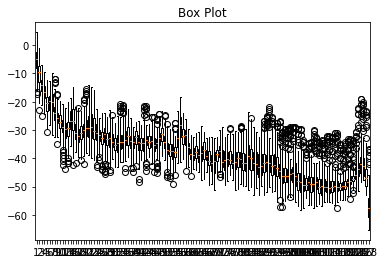

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_tr = np.load('/home/selim/Downloads/IDMT_Traffic/full_data.npy')
#plt.plot(data_tr[0][2])
#plt.plot(data_tr[0][3])
#plt.plot(data_tr[0][4])

#plt.show()


fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
ax1.boxplot(data_tr[0][:])

plt.show()

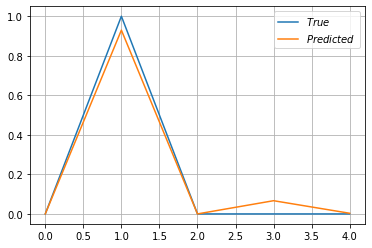

In [52]:
import matplotlib.pyplot as plt

true = [0., 1., 0., 0., 0.]
predicted = [0.000119674776, 0.92968816, 2.9894965e-05, 0.06684895, 0.00331329]

plt.grid()
plt.plot(true, label='$True$')
plt.plot(predicted,label='$Predicted$')
plt.legend()
plt.show()

In [53]:
true2 = [0., 0., 0., 0., 1.]
predicted2 = [4.9200095e-03, 5.0234910e-02, 2.7775371e-03, 9.5563196e-03, 9.3251121e-01]

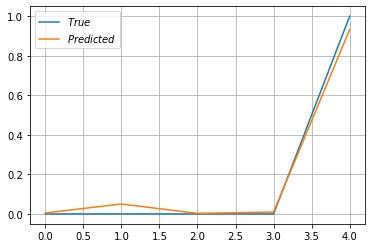

In [54]:
plt.grid()
plt.plot(true2, label='$True$')
plt.plot(predicted2,label='$Predicted$')
plt.legend()
plt.show()

In [78]:
true_label = Y_test.flatten()
label = model.predict(X_test)
predicted_label = label.flatten()

In [81]:
true_label

array([0., 1., 0., ..., 0., 0., 0.])

In [82]:
predicted_label

array([1.1967501e-04, 9.2968816e-01, 2.9894994e-05, ..., 2.3148814e-05,
       5.2887484e-02, 1.7464762e-03], dtype=float32)

In [83]:
#accuracy=pd.DataFrame(accuracy, columns=['val_accuracy'])
#proj_implemented=pd.DataFrame(proj_implemented, columns=['projection'])
#results=pd.concat([accuracy,proj_implemented],axis=1)

In [84]:
#results.groupby('projection').mean()

In [85]:
#_, accuracy = model.evaluate()

KeyError: 'accuracy'

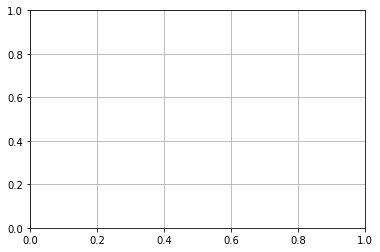

In [56]:
import matplotlib.pyplot as plt
plt.grid()
plt.plot(history.history['accuracy'], label='$Train ~Accuracy$')
plt.plot(history.history['val_accuracy'],label='$Test ~Accuracy$')
plt.legend()
plt.show()

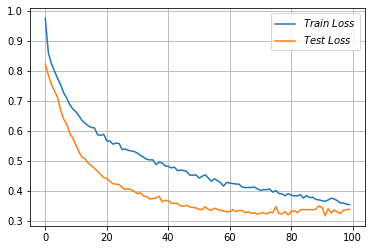

In [86]:
import matplotlib.pyplot as plt
plt.grid()
plt.plot(history.history['loss'], label='$Train ~Loss$')
plt.plot(history.history['val_loss'], label='$Test ~Loss$')
plt.legend()
plt.show()

In [38]:
#x_train = X_train.transpose()

In [50]:
#trial = x_train.reshape((X_train.shape[0]*X_train.shape[1]), X_train.shape[2])

In [52]:
#trial = x_train

In [25]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K
def cnn(x_tr):
    K.clear_session()
    inputs = Input(shape=(None, x_tr.shape[2])) #None,X.shape[2]))
    print(inputs.shape)
    #First Conv1D layer
    conv = Conv1D(8, 13, padding='same', activation='relu')(inputs)
    conv = Dropout(0.3)(conv)
    conv = MaxPooling1D(2)(conv)
    #Second Conv1D layer
    conv = Conv1D(16, 11, padding='same', activation='relu')(conv)
    conv = Dropout(0.3)(conv)
    conv = MaxPooling1D(2)(conv)
    #MaxPooling 1D
    conv = GlobalMaxPool1D()(conv)
    #Dense Layer
    conv = Dense(16, activation='relu')(conv)
    outputs = Dense(5,activation='sigmoid')(conv)
    model = Model(inputs, outputs)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    model_checkpoint = ModelCheckpoint('best_model_CNN.hdf5', monitor='val_acc',
                                 verbose=1, save_best_only=True, mode='max')
    return model, model_checkpoint
model2, model2_checkpoint = cnn(X_train)

(None, None, 128)


2022-11-29 13:43:15.051951: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-29 13:43:15.052004: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (selim-HP-EliteDesk-800-G1-TWR): /proc/driver/nvidia/version does not exist
2022-11-29 13:43:15.060572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
history=model2.fit(X_train, Y_train, epochs=200, callbacks=[model2_checkpoint],validation_data=(X_test, Y_test))

Epoch 1/200


2022-11-29 10:58:24.046045: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1061167104 exceeds 10% of free system memory.


437/438 [============================>.] - ETA: 0s - loss: 0.6803 - acc: 0.7186
Epoch 1: val_acc improved from -inf to 0.81097, saving model to best_model_CNN.hdf5
438/438 [==============================] - 8s 17ms/step - loss: 0.6796 - acc: 0.7188 - val_loss: 0.3353 - val_acc: 0.8110
Epoch 2/200
437/438 [============================>.] - ETA: 0s - loss: 0.2156 - acc: 0.8340
Epoch 2: val_acc improved from 0.81097 to 0.86865, saving model to best_model_CNN.hdf5
438/438 [==============================] - 7s 16ms/step - loss: 0.2155 - acc: 0.8340 - val_loss: 0.1745 - val_acc: 0.8686
Epoch 3/200
435/438 [============================>.] - ETA: 0s - loss: 0.1881 - acc: 0.8485
Epoch 3: val_acc did not improve from 0.86865
438/438 [==============================] - 7s 16ms/step - loss: 0.1884 - acc: 0.8485 - val_loss: 0.2442 - val_acc: 0.8395
Epoch 4/200
436/438 [============================>.] - ETA: 0s - loss: 0.1654 - acc: 0.8648
Epoch 4: val_acc improved from 0.86865 to 0.88635, saving mod

Epoch 31/200
438/438 [==============================] - ETA: 0s - loss: 0.1007 - acc: 0.9113
Epoch 31: val_acc did not improve from 0.91491
438/438 [==============================] - 7s 16ms/step - loss: 0.1007 - acc: 0.9113 - val_loss: 0.1366 - val_acc: 0.9032
Epoch 32/200
435/438 [============================>.] - ETA: 0s - loss: 0.1024 - acc: 0.9102
Epoch 32: val_acc did not improve from 0.91491
438/438 [==============================] - 7s 16ms/step - loss: 0.1025 - acc: 0.9100 - val_loss: 0.1378 - val_acc: 0.9138
Epoch 33/200
436/438 [============================>.] - ETA: 0s - loss: 0.0976 - acc: 0.9130
Epoch 33: val_acc did not improve from 0.91491
438/438 [==============================] - 7s 16ms/step - loss: 0.0978 - acc: 0.9128 - val_loss: 0.1066 - val_acc: 0.9106
Epoch 34/200
436/438 [============================>.] - ETA: 0s - loss: 0.0978 - acc: 0.9140
Epoch 34: val_acc did not improve from 0.91491
438/438 [==============================] - 7s 17ms/step - loss: 0.0981 - a

Epoch 62/200
435/438 [============================>.] - ETA: 0s - loss: 0.0921 - acc: 0.9155
Epoch 62: val_acc did not improve from 0.91976
438/438 [==============================] - 7s 16ms/step - loss: 0.0920 - acc: 0.9155 - val_loss: 0.1520 - val_acc: 0.9035
Epoch 63/200
436/438 [============================>.] - ETA: 0s - loss: 0.0918 - acc: 0.9178
Epoch 63: val_acc did not improve from 0.91976
438/438 [==============================] - 7s 16ms/step - loss: 0.0916 - acc: 0.9180 - val_loss: 0.1067 - val_acc: 0.9163
Epoch 64/200
437/438 [============================>.] - ETA: 0s - loss: 0.0917 - acc: 0.9161
Epoch 64: val_acc did not improve from 0.91976
438/438 [==============================] - 7s 16ms/step - loss: 0.0916 - acc: 0.9161 - val_loss: 0.1255 - val_acc: 0.9192
Epoch 65/200
436/438 [============================>.] - ETA: 0s - loss: 0.0922 - acc: 0.9171
Epoch 65: val_acc did not improve from 0.91976
438/438 [==============================] - 7s 16ms/step - loss: 0.0922 - a

Epoch 93/200
436/438 [============================>.] - ETA: 0s - loss: 0.0875 - acc: 0.9211
Epoch 93: val_acc did not improve from 0.92404
438/438 [==============================] - 7s 16ms/step - loss: 0.0878 - acc: 0.9210 - val_loss: 0.1449 - val_acc: 0.9086
Epoch 94/200
435/438 [============================>.] - ETA: 0s - loss: 0.0856 - acc: 0.9218
Epoch 94: val_acc did not improve from 0.92404
438/438 [==============================] - 7s 16ms/step - loss: 0.0856 - acc: 0.9219 - val_loss: 0.1230 - val_acc: 0.9209
Epoch 95/200
435/438 [============================>.] - ETA: 0s - loss: 0.0852 - acc: 0.9205
Epoch 95: val_acc did not improve from 0.92404
438/438 [==============================] - 7s 16ms/step - loss: 0.0852 - acc: 0.9207 - val_loss: 0.1026 - val_acc: 0.9189
Epoch 96/200
436/438 [============================>.] - ETA: 0s - loss: 0.0872 - acc: 0.9207
Epoch 96: val_acc did not improve from 0.92404
438/438 [==============================] - 7s 16ms/step - loss: 0.0871 - a

437/438 [============================>.] - ETA: 0s - loss: 0.0876 - acc: 0.9203
Epoch 155: val_acc did not improve from 0.92404
438/438 [==============================] - 8s 18ms/step - loss: 0.0876 - acc: 0.9202 - val_loss: 0.1367 - val_acc: 0.9169
Epoch 156/200
435/438 [============================>.] - ETA: 0s - loss: 0.0829 - acc: 0.9242
Epoch 156: val_acc did not improve from 0.92404
438/438 [==============================] - 7s 17ms/step - loss: 0.0829 - acc: 0.9242 - val_loss: 0.1095 - val_acc: 0.9160
Epoch 157/200
436/438 [============================>.] - ETA: 0s - loss: 0.0830 - acc: 0.9265
Epoch 157: val_acc did not improve from 0.92404
438/438 [==============================] - 7s 16ms/step - loss: 0.0831 - acc: 0.9264 - val_loss: 0.1145 - val_acc: 0.9209
Epoch 158/200
438/438 [==============================] - ETA: 0s - loss: 0.0803 - acc: 0.9257
Epoch 158: val_acc did not improve from 0.92404
438/438 [==============================] - 7s 16ms/step - loss: 0.0803 - acc: 0.

Epoch 186/200
437/438 [============================>.] - ETA: 0s - loss: 0.0784 - acc: 0.9272
Epoch 186: val_acc did not improve from 0.92519
438/438 [==============================] - 7s 16ms/step - loss: 0.0784 - acc: 0.9272 - val_loss: 0.1478 - val_acc: 0.8929
Epoch 187/200
438/438 [==============================] - ETA: 0s - loss: 0.0835 - acc: 0.9235
Epoch 187: val_acc did not improve from 0.92519
438/438 [==============================] - 7s 16ms/step - loss: 0.0835 - acc: 0.9235 - val_loss: 0.1251 - val_acc: 0.9123
Epoch 188/200
438/438 [==============================] - ETA: 0s - loss: 0.0827 - acc: 0.9244
Epoch 188: val_acc did not improve from 0.92519
438/438 [==============================] - 7s 16ms/step - loss: 0.0827 - acc: 0.9244 - val_loss: 0.1109 - val_acc: 0.9215
Epoch 189/200
436/438 [============================>.] - ETA: 0s - loss: 0.0799 - acc: 0.9274
Epoch 189: val_acc did not improve from 0.92519
438/438 [==============================] - 7s 16ms/step - loss: 0.

In [39]:
file = pd.DataFrame(history.history)
file.to_csv('audio_cnn.csv')

In [40]:
model2.load_weights('best_model_CNN.hdf5')

In [41]:
read = pd.read_csv('audio_cnn.csv')
read

,Unnamed: 0,loss,acc,val_loss,val_acc
0,0,0.679615,0.718795,0.335291,0.810965
1,1,0.215513,0.833976,0.174520,0.868647
2,2,0.188417,0.848472,0.244163,0.839520
3,3,0.165302,0.864896,0.150023,0.886351
4,4,0.169649,0.866467,0.143874,0.896916
...,...,...,...,...,...
195,195,0.080043,0.926664,0.120684,0.918618
196,196,0.078767,0.927378,0.111839,0.918618
197,197,0.079849,0.927378,0.104392,0.918903
198,198,0.080580,0.925664,0.103084,0.921759


In [42]:
max(model2.history.history['val_acc'])

0.9251856207847595

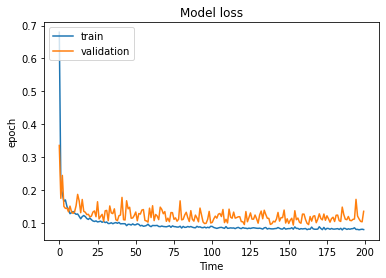

In [43]:
import matplotlib.pyplot as plt
plt.plot(model2.history.history['loss'])

plt.plot(model2.history.history['val_loss'])

plt.title('Model loss')

plt.xlabel('Time')

plt.ylabel('epoch')

plt.legend(['train','validation'],loc = 'upper left')

plt.show()

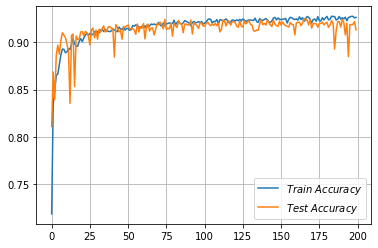

In [44]:
plt.grid()
plt.plot(model2.history.history['acc'], label='$Train ~Accuracy$')
plt.plot(model2.history.history['val_acc'],label='$Test ~Accuracy$')
plt.legend()
plt.show()

In [45]:
_, acc = model2.evaluate(X_test, Y_test)
print("Validation Accuracy:",acc)

110/110 [==============================] - 0s 4ms/step - loss: 0.1051 - acc: 0.9252
Validation Accuracy: 0.9251856207847595


In [26]:
def lstm(x_tr):
    K.clear_session()
    inputs = Input(shape=(None, x_tr.shape[2]))
    #lstm
    x = LSTM(128)(inputs)
    x = Dropout(0.3)(x)
    #dense
    x= Dense(64,activation='relu')(x)
    x= Dense(5,activation='sigmoid')(x)
    model3 = Model(inputs, x)
    model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    return model3

In [27]:
model3 = lstm(X_train)
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 128)]       0         
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 140,165
Trainable params: 140,165
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mc = ModelCheckpoint('best_model_lstm_2.hdf5', monitor='val_acc', verbose=1, save_best_only=True,
                                   mode='max')
history=model3.fit(X_train, Y_train, epochs=200, callbacks=[mc],validation_data=(X_test, Y_test))

2022-11-29 13:43:32.685441: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1061167104 exceeds 10% of free system memory.


Epoch 1/200
438/438 [==============================] - ETA: 0s - loss: 0.2852 - acc: 0.7024
Epoch 1: val_acc improved from -inf to 0.77556, saving model to best_model_lstm_2.hdf5
438/438 [==============================] - 40s 85ms/step - loss: 0.2852 - acc: 0.7024 - val_loss: 0.2475 - val_acc: 0.7756
Epoch 2/200
438/438 [==============================] - ETA: 0s - loss: 0.2599 - acc: 0.7350
Epoch 2: val_acc improved from 0.77556 to 0.84609, saving model to best_model_lstm_2.hdf5
438/438 [==============================] - 37s 85ms/step - loss: 0.2599 - acc: 0.7350 - val_loss: 0.1930 - val_acc: 0.8461
Epoch 3/200
438/438 [==============================] - ETA: 0s - loss: 0.2229 - acc: 0.7706
Epoch 3: val_acc improved from 0.84609 to 0.86008, saving model to best_model_lstm_2.hdf5
438/438 [==============================] - 38s 86ms/step - loss: 0.2229 - acc: 0.7706 - val_loss: 0.1663 - val_acc: 0.8601
Epoch 4/200
438/438 [==============================] - ETA: 0s - loss: 0.2326 - acc: 0.7

Epoch 61/200
438/438 [==============================] - ETA: 0s - loss: 0.1436 - acc: 0.8768
Epoch 61: val_acc did not improve from 0.90805
438/438 [==============================] - 40s 91ms/step - loss: 0.1436 - acc: 0.8768 - val_loss: 0.1179 - val_acc: 0.8952
Epoch 62/200
438/438 [==============================] - ETA: 0s - loss: 0.1472 - acc: 0.8660
Epoch 62: val_acc did not improve from 0.90805
438/438 [==============================] - 41s 93ms/step - loss: 0.1472 - acc: 0.8660 - val_loss: 0.1260 - val_acc: 0.8923
Epoch 63/200
438/438 [==============================] - ETA: 0s - loss: 0.1432 - acc: 0.8693
Epoch 63: val_acc did not improve from 0.90805
438/438 [==============================] - 40s 92ms/step - loss: 0.1432 - acc: 0.8693 - val_loss: 0.1130 - val_acc: 0.9069
Epoch 64/200
438/438 [==============================] - ETA: 0s - loss: 0.1418 - acc: 0.8787
Epoch 64: val_acc did not improve from 0.90805
438/438 [==============================] - 40s 91ms/step - loss: 0.1418

In [108]:
file = pd.DataFrame(history.history)
file.to_csv('audio_lstm.csv')

In [109]:
model3.load_weights('best_model_lstm.hdf5')

In [110]:
_, acc = model3.evaluate(X_test, Y_test)
print("Accuracy:",acc)

110/110 [==============================] - 3s 29ms/step - loss: 0.1104 - acc: 0.9143
Accuracy: 0.9143346548080444


In [111]:
model3.predict(X_test)

array([[4.80881333e-03, 8.82301331e-01, 1.62458420e-03, 1.31328017e-01,
        1.34728253e-02],
       [9.28938389e-04, 4.76226807e-02, 1.92463398e-03, 1.15596950e-02,
        9.46866512e-01],
       [8.44930400e-05, 3.17662060e-02, 1.44749880e-04, 4.55173850e-03,
        9.62173223e-01],
       ...,
       [4.80857491e-03, 8.82303119e-01, 1.62446499e-03, 1.31328583e-01,
        1.34706497e-02],
       [2.33548880e-03, 9.30091739e-01, 4.09632921e-04, 1.18995726e-01,
        1.51047111e-03],
       [4.80857491e-03, 8.82303119e-01, 1.62446499e-03, 1.31328613e-01,
        1.34706199e-02]], dtype=float32)

In [112]:
Y_test

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [114]:
data1 = pd.read_csv('/mnt/data/data/audio_transformer.csv')
data2 = pd.read_csv('audio_cnn.csv')
data3 = pd.read_csv('audio_lstm.csv')

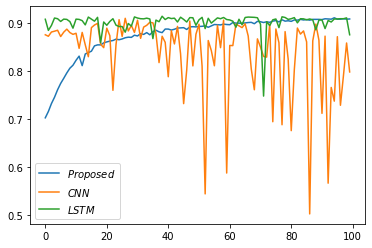

In [120]:
plt.plot(data1['val_accuracy'], label='$Proposed$')
plt.plot(data2['val_acc'],label='$CNN$')
plt.plot(data3['val_acc'],label='$LSTM$')
plt.legend()
plt.show()

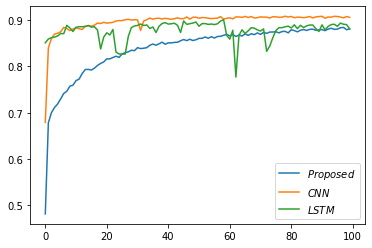

In [121]:
plt.plot(data1['accuracy'], label='$Proposed$')
plt.plot(data2['acc'],label='$CNN$')
plt.plot(data3['acc'],label='$LSTM$')
plt.legend()
plt.show()

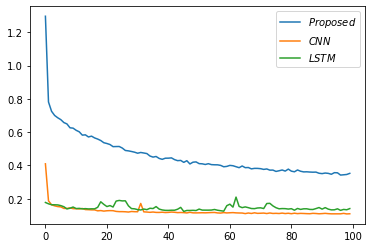

In [122]:
plt.plot(data1['loss'], label='$Proposed$')
plt.plot(data2['loss'],label='$CNN$')
plt.plot(data3['loss'],label='$LSTM$')
plt.legend()
plt.show()

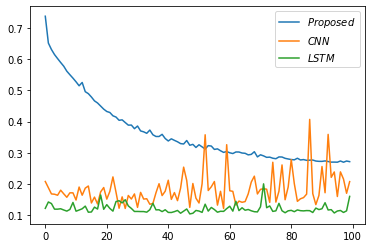

In [119]:
plt.plot(data1['val_loss'], label='$Proposed$')
plt.plot(data2['val_loss'],label='$CNN$')
plt.plot(data3['val_loss'],label='$LSTM$')
plt.legend()
plt.show()